In [1]:
pip install tensorflow-macos  # Apple Silicon i√ßin TensorFlowpip install tensorflow-metal  # Metal API ile GPU hƒ±zlandƒ±rma desteƒüi


[notice] A new release of pip is available: 24.3.1 -> 25.0.1
[notice] To update, run: /Users/filizsayin/gpu_env/bin/python3 -m pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [2]:
pip install tensorflow-metal  # Metal API ile GPU hƒ±zlandƒ±rma desteƒüi


[notice] A new release of pip is available: 24.3.1 -> 25.0.1
[notice] To update, run: /Users/filizsayin/gpu_env/bin/python3 -m pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [3]:
import tensorflow as tf
print("TensorFlow version:", tf.__version__)
print("GPU available:", len(tf.config.list_physical_devices('GPU')) > 0)

TensorFlow version: 2.16.2
GPU available: True


In [4]:
!pip install seaborn

In [5]:
!pip install pandas

In [6]:
pip install tensorflow==2.16.2 numpy==1.25.0 swifter


[notice] A new release of pip is available: 24.3.1 -> 25.0.1
[notice] To update, run: /Users/filizsayin/gpu_env/bin/python3 -m pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [7]:
import swifter
print("Swifter y√ºklendi!")

Swifter y√ºklendi!


/Users/filizsayin/gpu_env/lib/python3.9/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [8]:
import sys
print(sys.executable)

/Users/filizsayin/gpu_env/bin/python3


## 1- Duygu Analizi (Sentiment Analysis)

#### Gerekli K√ºt√ºphanelerin Y√ºklenmesi

In [11]:
import numpy as np
import pandas as pd
from IPython.display import display, HTML
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import re
import nltk
from nltk.corpus import stopwords
from bs4 import BeautifulSoup
from nltk.stem.snowball import SnowballStemmer
from nltk.stem import WordNetLemmatizer
import emoji
from wordcloud import WordCloud
import time
from langdetect import detect, DetectorFactory
from spellchecker import SpellChecker
import spacy
import swifter
from wordcloud import WordCloud
import matplotlib.pyplot as plt
import pandas as pd
import pandas as pd
import numpy as np
import tensorflow as tf
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense, Dropout, Bidirectional
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.utils.class_weight import compute_class_weight
from imblearn.over_sampling import SMOTE
import matplotlib.pyplot as plt
import os
import pickle




spell = SpellChecker(language='en')
from joblib import Parallel, delayed
# Ek: Dil tespiti ve yazƒ±m d√ºzeltme i√ßin


# SpaCy ƒ∞ngilizce modelini y√ºkleyin (ilk kez: !python -m spacy download en_core_web_sm)
nlp_en = spacy.load("en_core_web_sm")


# nltk verilerini indir (ilk kez √ßalƒ±≈ütƒ±rƒ±lacak)
nltk.download('stopwords')
nltk.download('wordnet')

# Dil tespiti i√ßin sabit seed ayarƒ± (tutarlƒ±lƒ±k)
DetectorFactory.seed = 0

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/filizsayin/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     /Users/filizsayin/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


### 1. Veri Y√ºkleme ve Doƒürulama

In [13]:
# Geni≈ü tablo g√∂r√ºnt√ºleme i√ßin
pd.set_option('display.max_columns', None)  # T√ºm s√ºtunlarƒ± g√∂ster
pd.set_option('display.width', 1000)        # Yatay geni≈üliƒüi artƒ±r
pd.set_option('display.colheader_justify', 'center')  # Ba≈ülƒ±klarƒ± ortala

### All_Beauty Review and Meta

In [15]:
# Dosya yolunu belirtin
file_path = r"/Users/filizsayin/Desktop/Bitirme_Projesi_FilizSayin/All_Beauty.jsonl.gz"

# Dosyayƒ± pandas ile gzip formatƒ±nda okuyun
df_All_Beauty_Review = pd.read_json(file_path, lines=True, compression='gzip')

df_All_Beauty_Review.head()

rating                   title                                           text                        images     asin    parent_asin            user_id                   timestamp         helpful_vote  verified_purchase
0     5    Such a lovely scent but not overpowering.  This spray is really nice. It smells really go...   []    B00YQ6X8EO  B00YQ6X8EO  AGKHLEW2SOWHNMFQIJGBECAF7INQ 2020-05-05 14:08:48.923        0             True       
1     4       Works great but smells a little weird.  This product does what I need it to do, I just...   []    B081TJ8YS3  B081TJ8YS3  AGKHLEW2SOWHNMFQIJGBECAF7INQ 2020-05-04 18:10:55.070        1             True       
2     5                                         Yes!                          Smells good, feels great!   []    B07PNNCSP9  B097R46CSY  AE74DYR3QUGVPZJ3P7RFWBGIX7XQ 2020-05-16 21:41:06.052        2             True       
3     1                            Synthetic feeling                                     Felt synthetic   []    B09JS339BZ  B09JS339BZ  AFQLNQNQYFWQZPJQZS6V3NZU4QBQ 2022-01-28 18:13:50.220        0             True       
4     5                                           A+                                            Love it   []    B08BZ63GMJ  B08BZ63GMJ  AFQLNQNQYFWQZPJQZS6V3NZU4QBQ 2020-12-30 10:02:43.534        0             True

In [16]:
# Dosya yolunu belirtin
file_path = r"/Users/filizsayin/Desktop/Bitirme_Projesi_FilizSayin/meta_All_Beauty.jsonl.gz"

# Dosyayƒ± pandas ile gzip formatƒ±nda okuyun
df_All_Beauty_Meta= pd.read_json(file_path, lines=True, compression='gzip')

# DataFrame'in ilk 5 satƒ±rƒ±nƒ± HTML formatƒ±nda yatay kaydƒ±rma √ßubuƒüu ile g√∂ster
df_All_Beauty_Meta.head()

main_category                       title                         average_rating  rating_number                      features                                         description                      price                       images                       videos          store          categories                      details                       parent_asin  bought_together
0   All Beauty   Howard LC0008 Leather Conditioner, 8-Ounce (4-...        4.8             10                                                      []                                                 []  NaN    [{'thumb': 'https://m.media-amazon.com/images/...   []           Howard Products     []      {'Package Dimensions': '7.1 x 5.5 x 3 inches; ...  B01CUPMQZE       NaN       
1   All Beauty   Yes to Tomatoes Detoxifying Charcoal Cleanser ...        4.5              3                                                      []                                                 []  NaN    [{'thumb': 'https://m.media-amazon.com/images/...   []                    Yes To     []      {'Item Form': 'Powder', 'Skin Type': 'Acne Pro...  B076WQZGPM       NaN       
2   All Beauty    Eye Patch Black Adult with Tie Band (6 Per Pack)        4.4             26                                                      []                                                 []  NaN    [{'thumb': 'https://m.media-amazon.com/images/...   []    Levine Health Products     []             {'Manufacturer': 'Levine Health Products'}  B000B658RI       NaN       
3   All Beauty   Tattoo Eyebrow Stickers, Waterproof Eyebrow, 4...        3.1            102                                                      []                                                 []  NaN    [{'thumb': 'https://m.media-amazon.com/images/...   []                  Cherioll     []      {'Brand': 'Cherioll', 'Item Form': 'Powder', '...  B088FKY3VD       NaN       
4   All Beauty   Precision Plunger Bars for Cartridge Grips ‚Äì 9...        4.3              7       [Material: 304 Stainless Steel; Brass tip, Len...  [The Precision Plunger Bars are designed to wo...  NaN    [{'thumb': 'https://m.media-amazon.com/images/...   []                 Precision     []                                {'UPC': '644287689178'}  B07NGFDN6G       NaN

#### Veri Setinin ƒ∞ncelenmesi

In [18]:
df_All_Beauty_Review.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 701528 entries, 0 to 701527
Data columns (total 10 columns):
 #   Column             Non-Null Count   Dtype         
---  ------             --------------   -----         
 0   rating             701528 non-null  int64         
 1   title              701528 non-null  object        
 2   text               701528 non-null  object        
 3   images             701528 non-null  object        
 4   asin               701528 non-null  object        
 5   parent_asin        701528 non-null  object        
 6   user_id            701528 non-null  object        
 7   timestamp          701528 non-null  datetime64[ns]
 8   helpful_vote       701528 non-null  int64         
 9   verified_purchase  701528 non-null  bool          
dtypes: bool(1), datetime64[ns](1), int64(2), object(6)
memory usage: 48.8+ MB


Bu DataFrame, 701.528 satƒ±r (√∂rnek) ve 10 s√ºtun i√ßeriyor. Her satƒ±r muhtemelen bir √ºr√ºn yorumu ile ili≈ükilendirilebilecek bilgileri temsil ediyor. ƒ∞≈üte s√ºtunlarƒ±n kƒ±sa a√ßƒ±klamalarƒ±:

‚Ä¢	rating (int64): Kullanƒ±cƒ±nƒ±n √ºr√ºne verdiƒüi puan. (√ñrneƒüin 1‚Äôden 5‚Äôe kadar olabilir.)
‚Ä¢	title (object): Yorumun ba≈ülƒ±ƒüƒ±.
‚Ä¢	text (object): Yorumun detaylƒ± metni.
‚Ä¢	images (object): Yorumda yer alan g√∂rsellerle ilgili bilgiler (muhtemelen URL veya dosya isimleri).
‚Ä¢	asin (object): √úr√ºne ait benzersiz tanƒ±mlayƒ±cƒ±, Amazon Standard Identification Number (ASIN).
‚Ä¢	parent_asin (object): Eƒüer √ºr√ºn bir varyasyon i√ßeriyorsa, ana √ºr√ºn√ºn ASIN numarasƒ± olabilir.
‚Ä¢	user_id (object): Yorumu yapan kullanƒ±cƒ±nƒ±n kimliƒüi.
‚Ä¢	timestamp (datetime64[ns]): Yorumun olu≈üturulduƒüu tarih ve saat.
‚Ä¢	helpful_vote (int64): Yorumun ka√ß ki≈üi tarafƒ±ndan faydalƒ± bulunduƒüunu g√∂steren oy sayƒ±sƒ±.
‚Ä¢	verified_purchase (bool): √úr√ºn√ºn doƒürulanmƒ±≈ü satƒ±n alma olup olmadƒ±ƒüƒ±nƒ± belirten bayrak (True/False).

In [20]:
df_All_Beauty_Meta.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 112590 entries, 0 to 112589
Data columns (total 14 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   main_category    112590 non-null  object 
 1   title            112590 non-null  object 
 2   average_rating   112590 non-null  float64
 3   rating_number    112590 non-null  int64  
 4   features         112590 non-null  object 
 5   description      112590 non-null  object 
 6   price            17704 non-null   float64
 7   images           112590 non-null  object 
 8   videos           112590 non-null  object 
 9   store            101259 non-null  object 
 10  categories       112590 non-null  object 
 11  details          112590 non-null  object 
 12  parent_asin      112590 non-null  object 
 13  bought_together  0 non-null       float64
dtypes: float64(3), int64(1), object(10)
memory usage: 12.0+ MB


Genel Bilgiler

	‚Ä¢	Satƒ±r Sayƒ±sƒ± (RangeIndex):
	‚Ä¢	Veri setinde 112,590 satƒ±r var. Her satƒ±r, bir √ºr√ºn veya inceleme gibi bir veri noktasƒ± anlamƒ±na geliyor.
	‚Ä¢	S√ºtun Sayƒ±sƒ±:
	‚Ä¢	Veri setinde 14 s√ºtun var. Her s√ºtun, √ºr√ºnle ilgili farklƒ± bir √∂zelliƒüi temsil ediyor.
	‚Ä¢	Bellek Kullanƒ±mƒ±:
	‚Ä¢	Veri seti bellekte yakla≈üƒ±k 12 MB yer kaplƒ±yor. Bu orta b√ºy√ºkl√ºkte bir veri seti olarak d√º≈ü√ºn√ºlebilir.

a) main_category (object)
	‚Ä¢	Bu s√ºtun, √ºr√ºnlerin ana kategorisini temsil eder. √ñrneƒüin: ‚ÄúBeauty‚Äù, ‚ÄúSkincare‚Äù gibi.

b) title (object)
	‚Ä¢	Bu s√ºtun, √ºr√ºn√ºn ba≈ülƒ±ƒüƒ±nƒ± i√ßeriyor. √ñrneƒüin: ‚ÄúMoisturizing Cream‚Äù, ‚ÄúHair Shampoo‚Äù gibi.

c) average_rating (float64)
	‚Ä¢	√úr√ºn√ºn ortalama kullanƒ±cƒ± puanƒ±nƒ± ifade eder. √ñrneƒüin: 4.5, 3.8 gibi.
	‚Ä¢	Bu s√ºtunun tipi float64, yani ondalƒ±k sayƒ±lar i√ßeriyor.

d) rating_number (int64)
	‚Ä¢	Bu s√ºtun, bir √ºr√ºne verilen toplam oy sayƒ±sƒ±nƒ± g√∂steriyor. √ñrneƒüin: 453, 1200.
	‚Ä¢	Veri t√ºr√º int64, yani tam sayƒ± i√ßeriyor.

e) features (object)
	‚Ä¢	√úr√ºn√ºn √∂zelliklerini veya teknik detaylarƒ±nƒ± i√ßeriyor. Bu veri genellikle metin veya JSON formatƒ±nda olabilir.

f) description (object)
	‚Ä¢	√úr√ºn√ºn a√ßƒ±klamasƒ±nƒ± i√ßeriyor. √ñrneƒüin: √úr√ºn√ºn nasƒ±l kullanƒ±lacaƒüƒ±, i√ßerikleri, veya avantajlarƒ±nƒ± i√ßeren metin bilgisi.

g) price (float64)
	‚Ä¢	17,704 non-null (eksik):
	‚Ä¢	Bu s√ºtunda 94,886 satƒ±rda eksik deƒüer (NaN) var.
	‚Ä¢	Bu, √ºr√ºnlerin b√ºy√ºk bir kƒ±smƒ± i√ßin fiyat bilgisinin mevcut olmadƒ±ƒüƒ±nƒ± g√∂steriyor.
	‚Ä¢	Eksik fiyatlar doldurulabilir (√∂rneƒüin, ortalama ile) veya fiyatƒ± olmayan √ºr√ºnler √ßƒ±karƒ±labilir.
	‚Ä¢	Veri t√ºr√º float64, yani fiyatlar ondalƒ±klƒ± sayƒ±lar olarak saklanƒ±yor.

h) images (object)
	‚Ä¢	√úr√ºn g√∂rsellerinin URL‚Äôlerini i√ßeriyor. Bu veri, genellikle liste veya JSON formatƒ±nda olabilir.

i) videos (object)
	‚Ä¢	√úr√ºn videolarƒ±nƒ± temsil eden URL‚Äôler i√ßeriyor. G√∂rsel s√ºtununa benzer bir yapƒ± olabilir.

j) store (object)
	‚Ä¢	101,259 non-null:
	‚Ä¢	11,331 satƒ±rda eksik deƒüer (NaN) var.
	‚Ä¢	Bu s√ºtun, √ºr√ºn√º satan maƒüaza bilgisini i√ßeriyor. Eksik maƒüaza bilgileri doldurulabilir (√∂rneƒüin, ‚ÄúUnknown‚Äù olarak).

k) categories (object)
	‚Ä¢	√úr√ºn√ºn ait olduƒüu kategorileri i√ßeriyor. √ñrneƒüin: [‚ÄúBeauty‚Äù, ‚ÄúSkincare‚Äù] gibi bir liste olabilir.

l) details (object)
	‚Ä¢	√úr√ºn√ºn teknik detaylarƒ±nƒ± i√ßerir. JSON formatƒ±nda veya metinsel bir veri olabilir.

m) parent_asin (object)
	‚Ä¢	√úr√ºn√ºn ‚Äúparent ASIN‚Äù (Amazon Standart Kimlik Numarasƒ±) bilgisi. Varyasyonlar veya alt √ºr√ºn gruplarƒ± i√ßin kullanƒ±labilir.

n) bought_together (float64)
	‚Ä¢	0 non-null (tamamen eksik):
	‚Ä¢	Bu s√ºtun tamamen bo≈ü, yani hi√ßbir satƒ±rda deƒüer i√ßermiyor.
	‚Ä¢	Muhtemelen bu s√ºtun veri setinden kaldƒ±rƒ±labilir, √ß√ºnk√º herhangi bir bilgi saƒülamƒ±yor.

#### Eksik Deƒüerlerin Analizi

In [24]:
df_All_Beauty_Review.isna().sum()

rating               0
title                0
text                 0
images               0
asin                 0
parent_asin          0
user_id              0
timestamp            0
helpful_vote         0
verified_purchase    0
dtype: int64

In [25]:
df_All_Beauty_Meta.isna().sum()

main_category           0
title                   0
average_rating          0
rating_number           0
features                0
description             0
price               94886
images                  0
videos                  0
store               11331
categories              0
details                 0
parent_asin             0
bought_together    112590
dtype: int64

Eksik Deƒüer Sayƒ±larƒ±:
	1.	price: 94,886 eksik deƒüer.
	‚Ä¢	Bu s√ºtun √ºr√ºn fiyatlarƒ±nƒ± i√ßeriyor olmalƒ± ve eksik deƒüerler bazƒ± √ºr√ºnler i√ßin fiyat bilgisinin olmadƒ±ƒüƒ±nƒ± g√∂steriyor.
	‚Ä¢	Bu eksiklik, fiyat analizi yaparken dikkat edilmesi gereken bir durumdur.
	2.	store: 11,331 eksik deƒüer.
	‚Ä¢	Bu s√ºtun, √ºr√ºn√ºn satƒ±≈üta olduƒüu maƒüazalarƒ± i√ßeriyor olabilir.
	‚Ä¢	Eksik deƒüerler, √ºr√ºnlerin belirli maƒüazalarda bulunmadƒ±ƒüƒ±nƒ± veya maƒüaza bilgilerinin eksik olduƒüunu g√∂sterebilir.
	3.	bought_together: 112,590 eksik deƒüer.
	‚Ä¢	Bu s√ºtun, √ºr√ºnle birlikte satƒ±n alƒ±nan diƒüer √ºr√ºnleri temsil ediyor olabilir.
	‚Ä¢	Eksik deƒüerler, bazƒ± √ºr√ºnlerin ba≈üka bir √ºr√ºnle birlikte satƒ±n alƒ±nmadƒ±ƒüƒ±nƒ± g√∂sterebilir.

In [27]:
# Eksik veri oranlarƒ±nƒ± hesaplama
missing_percentage = df_All_Beauty_Review.isna().sum() / len(df_All_Beauty_Review) * 100
print(missing_percentage)

rating               0.0
title                0.0
text                 0.0
images               0.0
asin                 0.0
parent_asin          0.0
user_id              0.0
timestamp            0.0
helpful_vote         0.0
verified_purchase    0.0
dtype: float64


In [28]:
# Eksik veri oranlarƒ±nƒ± hesaplama
missing_percentage = df_All_Beauty_Meta.isna().sum() / len(df_All_Beauty_Meta) * 100
print(missing_percentage)

main_category        0.000000
title                0.000000
average_rating       0.000000
rating_number        0.000000
features             0.000000
description          0.000000
price               84.275691
images               0.000000
videos               0.000000
store               10.063949
categories           0.000000
details              0.000000
parent_asin          0.000000
bought_together    100.000000
dtype: float64


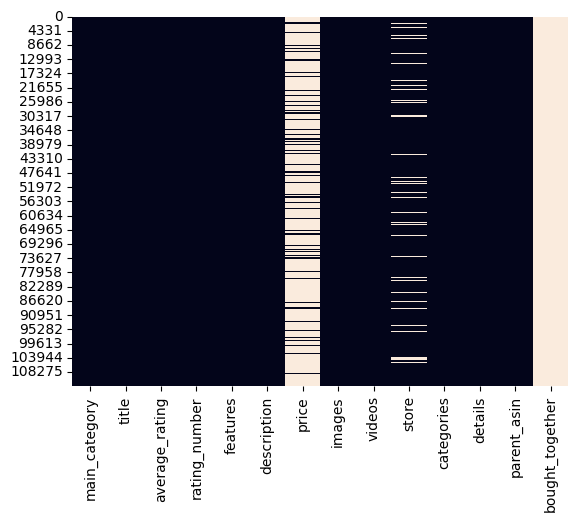

In [29]:
sns.heatmap(df_All_Beauty_Meta.isnull(), cbar=False)
plt.show()

Eksik Verilerin Daƒüƒ±lƒ±mƒ±:
	‚Ä¢	price, images, videos, store ve bought_together s√ºtunlarƒ±nda yoƒüun ≈üekilde eksik deƒüer bulunmaktadƒ±r.
	‚Ä¢	main_category, title, average_rating gibi s√ºtunlar ise genellikle eksiksiz g√∂r√ºnmektedir.

### Digital_Music Review and Meta

In [32]:
# Dosya yolunu belirtin
file_path = r"/Users/filizsayin/Desktop/Bitirme_Projesi_FilizSayin/Digital_Music.jsonl.gz"

# Dosyayƒ± pandas ile gzip formatƒ±nda okuyun
Digital_Music_Review = pd.read_json(file_path, lines=True, compression='gzip')

Digital_Music_Review.head()

rating               title                                      text                        images     asin    parent_asin            user_id                   timestamp         helpful_vote  verified_purchase
0     5                                Nice  If i had a dollar for how many times I have pl...   []    B004RQ2IRG  B004RQ2IRG  AFUOYIZBU3MTBOLYKOJE5Z35MBDA 2021-04-21 02:36:53.292        0              True      
1     5                           Excellent  awesome sound - cant wait to see them in perso...   []    B0026UZEI0  B0026UZEI0  AHGAOIZVODNHYMNCBV4DECZH42UQ 2011-06-15 19:52:05.000        0              True      
2     5                       Great service  This is a great cd. Good music and plays well....   []    B0055JSYHC  B0055JSYHC  AFGEM6BXCYHUILEOA3P2ZYBEF2TA 2021-03-15 20:06:33.006        0              True      
3     1                             No good  These are not real German singers, they have a...   []    B000F9SMUQ  B000F9SMUQ  AH3OG6QD6EDJGZRVCFKV4B66VWNQ 2014-07-13 02:49:01.000        0              True      
4     3    Cool concept, so-so execution...  I first heard this playing in a Nagoya shop an...   []    B0049D1WVK  B0049D1WVK  AFW2PDT3AMT4X3PYQG7FJZH5FXFA 2011-06-25 19:19:55.000        0             False

In [33]:
# Dosya yolunu belirtin
file_path = r"/Users/filizsayin/Desktop/Bitirme_Projesi_FilizSayin/meta_Digital_Music.jsonl.gz"

# Dosyayƒ± pandas ile gzip formatƒ±nda okuyun
Digital_Music_Meta = pd.read_json(file_path, lines=True, compression='gzip')

Digital_Music_Meta.head()

main_category                        title                         average_rating  rating_number features              description                price                       images                       videos                       store                        categories                      details                       parent_asin  bought_together
0  Digital Music                                  Baja Marimba Band        4.9             8          []                                       []     NaN  [{'thumb': 'https://m.media-amazon.com/images/...   []                                                 None     []          {'Date First Available': 'February 28, 2010'}  B000V87RP2       NaN       
1  Digital Music   '80s Halloween-All Original Artists & Recordings        5.0             3          []                                       []   14.98  [{'thumb': 'https://m.media-amazon.com/images/...   []    Love and Rockets  (Artist),     Duran Duran  (...     []      {'Package Dimensions': '5.55 x 4.97 x 0.54 inc...  B0062F0MJQ       NaN       
2  Digital Music                                            TRIO +1        5.0             1          []                               [CD ALBUM]   57.99  [{'thumb': 'https://m.media-amazon.com/images/...   []                     Rob Wasserman   Format: Audio CD     []      {'Is Discontinued By Manufacturer': 'No', 'Pac...  B00005GT12       NaN       
3  Digital Music  Gold and Silver: Lehar, Delibes, Lanner, Johan...        5.0             1          []                                       []   29.91  [{'thumb': 'https://m.media-amazon.com/images/...   []    Franz Lehar  (Composer),     Leo Delibes  (Com...     []      {'Manufacturer': 'Hungaroton / White Label', '...  B0007PD2BW       NaN       
4  Digital Music  Grateful Dead Dave's Picks Volume 25 Live at B...        4.9            20          []     [Sold out. Numbered limited edition]  149.99  [{'thumb': 'https://m.media-amazon.com/images/...   []    Grateful Dead  (Artist, Orchestra)    Format: ...     []      {'Package Dimensions': '5.55 x 4.97 x 0.54 inc...  B079CPD45R       NaN

In [34]:
Digital_Music_Review.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 130434 entries, 0 to 130433
Data columns (total 10 columns):
 #   Column             Non-Null Count   Dtype         
---  ------             --------------   -----         
 0   rating             130434 non-null  int64         
 1   title              130434 non-null  object        
 2   text               130434 non-null  object        
 3   images             130434 non-null  object        
 4   asin               130434 non-null  object        
 5   parent_asin        130434 non-null  object        
 6   user_id            130434 non-null  object        
 7   timestamp          130434 non-null  datetime64[ns]
 8   helpful_vote       130434 non-null  int64         
 9   verified_purchase  130434 non-null  bool          
dtypes: bool(1), datetime64[ns](1), int64(2), object(6)
memory usage: 9.1+ MB


In [35]:
Digital_Music_Meta.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70537 entries, 0 to 70536
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   main_category    70537 non-null  object 
 1   title            70537 non-null  object 
 2   average_rating   70537 non-null  float64
 3   rating_number    70537 non-null  int64  
 4   features         70537 non-null  object 
 5   description      70537 non-null  object 
 6   price            40125 non-null  float64
 7   images           70537 non-null  object 
 8   videos           70537 non-null  object 
 9   store            66299 non-null  object 
 10  categories       70537 non-null  object 
 11  details          70537 non-null  object 
 12  parent_asin      70537 non-null  object 
 13  bought_together  0 non-null      float64
dtypes: float64(3), int64(1), object(10)
memory usage: 7.5+ MB


In [36]:
Digital_Music_Review.isna().sum()

rating               0
title                0
text                 0
images               0
asin                 0
parent_asin          0
user_id              0
timestamp            0
helpful_vote         0
verified_purchase    0
dtype: int64

In [37]:
Digital_Music_Meta.isna().sum()

main_category          0
title                  0
average_rating         0
rating_number          0
features               0
description            0
price              30412
images                 0
videos                 0
store               4238
categories             0
details                0
parent_asin            0
bought_together    70537
dtype: int64

Digital_Music meta veri setinde g√∂zlemlenen eksik deƒüerler ≈üunlar:
	‚Ä¢	price: 30.412 eksik
	‚Ä¢	store: 4.238 eksik
	‚Ä¢	bought_together: 70.537 eksik

In [39]:
# Eksik veri oranlarƒ±nƒ± hesaplama
missing_percentage = Digital_Music_Meta.isna().sum() / len(Digital_Music_Meta) * 100
print(missing_percentage)

main_category        0.000000
title                0.000000
average_rating       0.000000
rating_number        0.000000
features             0.000000
description          0.000000
price               43.114961
images               0.000000
videos               0.000000
store                6.008194
categories           0.000000
details              0.000000
parent_asin          0.000000
bought_together    100.000000
dtype: float64


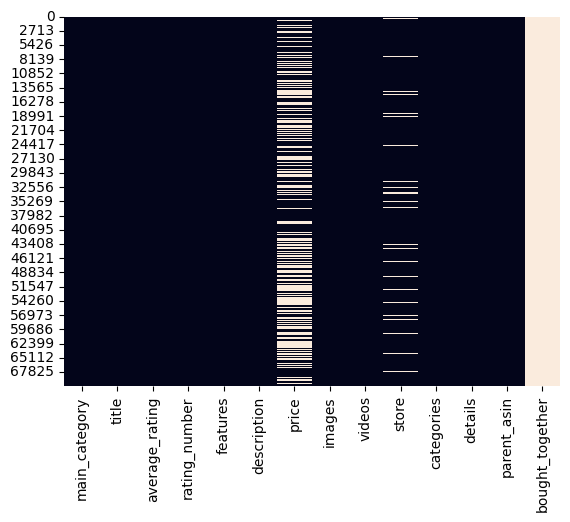

In [40]:
sns.heatmap(Digital_Music_Meta.isnull(), cbar=False)
plt.show()

### Health_and_Personal_Care Review and Meta

In [42]:
# Dosya yolunu belirtin
file_path = r"/Users/filizsayin/Desktop/Bitirme_Projesi_FilizSayin/Health_and_Personal_Care.jsonl.gz"

# Dosyayƒ± pandas ile gzip formatƒ±nda okuyun
Health_and_Personal_Care_Review  = pd.read_json(file_path, lines=True, compression='gzip')

Health_and_Personal_Care_Review.head()

rating                       title                                               text                        images     asin    parent_asin            user_id                   timestamp         helpful_vote  verified_purchase
0     4    12 mg is 12 on the periodic table people! Mg f...  This review is more to clarify someone else‚Äôs ...   []    B07TDSJZMR  B07TDSJZMR  AFKZENTNBQ7A7V7UXW5JJI6UGRYQ 2020-02-06 00:49:35.902        3             True       
1     5                   Save the lanet using less plastic.  Love these easy multitasking bleach tablets. B...   []    B08637FWWF  B08637FWWF  AEVWAM3YWN5URJVJIZZ6XPD2MKIA 2020-11-02 22:03:06.880        3             True       
2     5                                            Fantastic  I have been suffering a couple months with hee...   []    B07KJVGNN5  B07KJVGNN5  AHSPLDNW5OOUK2PLH7GXLACFBZNQ 2019-07-24 11:13:58.905        0             True       
3     4    It holds the water and makes bubbles.  That's ...  It's cheap and it does what I wanted.  The "ma...   []    B007HY7GC2  B092RP73CX  AEZGPLOYTSAPR3DHZKKXEFPAXUAA 2022-09-04 02:29:02.725        7             True       
4     1                                           Not for me  Didn't do a thing for me. Not saying they don'...   []    B08KYJLF5T  B08KYJLF5T  AEQAYV7RXZEBXMQIQPL6KCT2CFWQ 2022-01-20 23:53:07.262        0             True

In [43]:
# Dosya yolunu belirtin
file_path = r"/Users/filizsayin/Desktop/Bitirme_Projesi_FilizSayin/meta_Health_and_Personal_Care.jsonl.gz"

# Dosyayƒ± pandas ile gzip formatƒ±nda okuyun
Health_and_Personal_Care_Meta = pd.read_json(file_path, lines=True, compression='gzip')

Health_and_Personal_Care_Meta.head()

main_category                            title                         average_rating  rating_number                      features                                         description                      price                       images                       videos    store    categories                      details                       parent_asin  bought_together
0  Health & Personal Care  Silicone Bath Body Brush Exfoliator Shower Bac...        3.9             7                                                       []                                                 []    NaN  [{'thumb': 'https://m.media-amazon.com/images/...   []        Rzoeox     []      {'Package Dimensions': '15 x 3.3 x 1.5 inches;...  B07V346GZH       NaN       
1  Health & Personal Care  iPhone 7 Plus 8 Plus Screen Protector, ZHXIN T...        3.8             2        [Tough and Robust: Like all 78X screen protect...  [Features: 2.5D Arc Edge Treatment: The edge i...    NaN  [{'thumb': 'https://m.media-amazon.com/images/...   []         ZHXIN     []      {'Brand': 'ZHXIN', 'Compatible Devices': 'Cell...  B075W927RH       NaN       
2  Health & Personal Care  Zig Zag Rolling Machine 70mm Size With FREE BO...        3.9             7                                                       []                                                 []    NaN  [{'thumb': 'https://m.media-amazon.com/images/...   []          None     []      {'Package Dimensions': '4.1 x 1.8 x 0.3 inches...  B01FB26VKY       NaN       
3  Health & Personal Care    Sting-Kill Disposable Wipes 8 Each ( Pack of 5)        4.1             6                                                       []  [effective on stings and bites from bees, wasp...  21.37  [{'thumb': 'https://m.media-amazon.com/images/...   []    Sting-kill     []      {'Brand': 'Sting-kill', 'Item Form': 'Wipe', '...  B01IAI29RU       NaN       
4  Health & Personal Care  Heated Eyelash Curler Mini Portable Electric E...        3.3             8                                                       []                                                 []    NaN  [{'thumb': 'https://m.media-amazon.com/images/...   []        BiBOSS     []      {'Package Dimensions': '6.1 x 3.1 x 1.9 inches...  B08CMN38RC       NaN

In [44]:
Health_and_Personal_Care_Review.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 494121 entries, 0 to 494120
Data columns (total 10 columns):
 #   Column             Non-Null Count   Dtype         
---  ------             --------------   -----         
 0   rating             494121 non-null  int64         
 1   title              494121 non-null  object        
 2   text               494121 non-null  object        
 3   images             494121 non-null  object        
 4   asin               494121 non-null  object        
 5   parent_asin        494121 non-null  object        
 6   user_id            494121 non-null  object        
 7   timestamp          494121 non-null  datetime64[ns]
 8   helpful_vote       494121 non-null  int64         
 9   verified_purchase  494121 non-null  bool          
dtypes: bool(1), datetime64[ns](1), int64(2), object(6)
memory usage: 34.4+ MB


In [45]:
Health_and_Personal_Care_Meta.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 60293 entries, 0 to 60292
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   main_category    60293 non-null  object 
 1   title            60293 non-null  object 
 2   average_rating   60293 non-null  float64
 3   rating_number    60293 non-null  int64  
 4   features         60293 non-null  object 
 5   description      60293 non-null  object 
 6   price            10536 non-null  float64
 7   images           60293 non-null  object 
 8   videos           60293 non-null  object 
 9   store            57947 non-null  object 
 10  categories       60293 non-null  object 
 11  details          60293 non-null  object 
 12  parent_asin      60293 non-null  object 
 13  bought_together  0 non-null      float64
dtypes: float64(3), int64(1), object(10)
memory usage: 6.4+ MB


In [46]:
Health_and_Personal_Care_Review.isna().sum()

rating               0
title                0
text                 0
images               0
asin                 0
parent_asin          0
user_id              0
timestamp            0
helpful_vote         0
verified_purchase    0
dtype: int64

In [47]:
Health_and_Personal_Care_Meta.isna().sum()

main_category          0
title                  0
average_rating         0
rating_number          0
features               0
description            0
price              49757
images                 0
videos                 0
store               2346
categories             0
details                0
parent_asin            0
bought_together    60293
dtype: int64

In [48]:
# Eksik veri oranlarƒ±nƒ± hesaplama
missing_percentage = Health_and_Personal_Care_Meta.isna().sum() / len(Health_and_Personal_Care_Meta) * 100
print(missing_percentage)

main_category        0.000000
title                0.000000
average_rating       0.000000
rating_number        0.000000
features             0.000000
description          0.000000
price               82.525335
images               0.000000
videos               0.000000
store                3.890999
categories           0.000000
details              0.000000
parent_asin          0.000000
bought_together    100.000000
dtype: float64


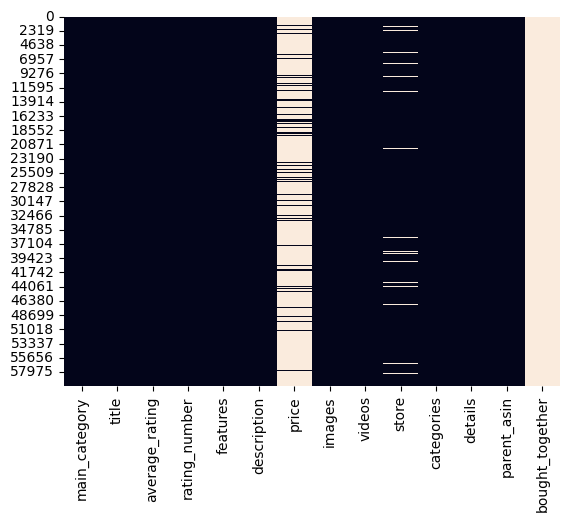

In [49]:
sns.heatmap(Health_and_Personal_Care_Meta.isnull(), cbar=False)
plt.show()

### Duygu Analizi (Sentiment Analysis)

#### Veri Birle≈ütirme,Etiketleme ve Hazƒ±rlama

In [52]:
#  T√ºm Veri Setlerini Birle≈ütirme:
#√ú√ß  kategoriye ait review veri setleri birle≈ütirme
df_all = pd.concat([df_All_Beauty_Review, Digital_Music_Review, Health_and_Personal_Care_Review], ignore_index=True)

In [53]:
# Duygu Etiketlemesi:
# Rating s√ºtununa g√∂re, rating ‚â• 3 ise "pozitif", rating < 3 ise "negatif" etiketi ekleyelim.
df_all['sentiment'] = df_all['rating'].apply(lambda x: 'pozitif' if x >= 3 else 'negatif')


In [54]:
df_all.columns

Index(['rating', 'title', 'text', 'images', 'asin', 'parent_asin', 'user_id', 'timestamp', 'helpful_vote', 'verified_purchase', 'sentiment'], dtype='object')

In [55]:
# Veriyi Karƒ±≈ütƒ±rma:
# Eƒüer veri seti sƒ±ralƒ± veya belirli bir d√ºzen i√ßeriyorsa, √∂nce manuel olarak karƒ±≈ütƒ±rmak daha tutarlƒ± bir eƒüitim-test b√∂lmesi saƒülar.
df_all = df_all.sample(frac=1, random_state=42).reset_index(drop=True)
print("Toplam veri sayƒ±sƒ±:", df_all.shape)

Toplam veri sayƒ±sƒ±: (1326083, 11)


In [56]:
#Train-Test Split:
# Stratified (sentiment daƒüƒ±lƒ±mƒ±nƒ± koruyarak) %80 eƒüitim, %20 test olacak ≈üekilde b√∂lme yapƒ±yoruz.
train_df, test_df = train_test_split(df_all, test_size=0.2, random_state=42, stratify=df_all['sentiment'])

# Sonu√ßlarƒ± Kontrol Edelim:
print("Eƒüitim seti boyutu:", train_df.shape)
print("Test seti boyutu:", test_df.shape)
print("Eƒüitim setinden ilk 5 satƒ±r:")
print(train_df.head())

Eƒüitim seti boyutu: (1060866, 11)
Test seti boyutu: (265217, 11)
Eƒüitim setinden ilk 5 satƒ±r:
         rating                       title                                               text                        images     asin    parent_asin            user_id                   timestamp         helpful_vote  verified_purchase sentiment
1131015     5                                             Clippers  My husband loves these clippers, they are much...   []    B00AWD22O2  B00AWD22O2  AFICNOD7NXCJ6HON44QMPELFG6TQ 2014-05-23 13:10:58.000       19              True         pozitif
1159205     5                             Natural looking coverage  I have always strayed away from foundation due...   []    B07JYV4FCQ  B07JYV4FCQ  AEBWGXGGL3Q5DSTMUQSTVUJDWSMA 2021-03-16 16:54:38.832        1             False         pozitif
523649      5    Wonderfully expressive cello interpretations o...  Wonderfully expressive cello interpretations o...   []    B0011DGFEU  B0011DGFEU  AG3RNHHOZ4HLI2K

1.	Veri Seti Boyutu:
Toplamda 1.326.083 satƒ±r ve 11 s√ºtun elde ettik. Bu, √º√ß veri setinin birle≈ütirilmesi sonucu beklenen b√ºy√ºkl√ºkte.
	2.	Train-Test Split Oranƒ±:
Eƒüitim seti 1.060.866 satƒ±r, test seti ise 265.217 satƒ±r olarak %80-%20 oranƒ±nda b√∂l√ºnm√º≈ü. Bu oran, stratify parametresi kullanƒ±larak duygu etiket daƒüƒ±lƒ±mƒ± korunarak yapƒ±ldƒ±ƒüƒ± i√ßin tutarlƒ±.
	3.	Duygu Etiketlemesi:
ƒ∞lk 5 satƒ±rda yer alan yorumlarƒ±n tamamƒ±nda rating deƒüeri 5 ve sentiment ‚Äúpozitif‚Äù olarak etiketlenmi≈ü. Eƒüer genel duygu daƒüƒ±lƒ±mƒ± da √ßoƒüunlukla pozitif ise, bu durum beklenen bir sonu√ßtur.
	4.	Veri Daƒüƒ±lƒ±mƒ±:
Rastgele karƒ±≈ütƒ±rma (shuffle) i≈ülemi uygulanmƒ±≈ü ve train-test split de stratified ≈üekilde yapƒ±ldƒ±ƒüƒ± i√ßin, verilerin daƒüƒ±lƒ±mƒ± da dengeli olmalƒ±dƒ±r.

Sonu√ß olarak, bu adƒ±mlara dayanarak elde ettiƒüimiz √ßƒ±ktƒ±, veri setinin birle≈ütirilmesi, etiketlenmesi ve b√∂l√ºnmesi i≈ülemlerinin doƒüru ve tutarlƒ± bir ≈üekilde ger√ßekle≈ütirildiƒüini g√∂steriyor. 

In [58]:
print(df_all['sentiment'].value_counts())

sentiment
pozitif    1073215
negatif     252868
Name: count, dtype: int64


Veri dengesizliƒüi var

In [60]:
import sys
print(sys.executable)

/Users/filizsayin/gpu_env/bin/python3


#### Birle≈ütirme ve Duygu Etiketlemesi Sonrasƒ± G√∂rselle≈ütirmeler

A≈üaƒüƒ±da, √º√ß veri setini birle≈ütirip duygu etiketlemesi (rating ‚â• 3 ‚Üí ‚Äúpozitif‚Äù, rating < 3 ‚Üí ‚Äúnegatif‚Äù) uyguladƒ±ktan sonra, verinin rastgele karƒ±≈ütƒ±rƒ±lmasƒ±nƒ±n (shuffle) ve train-test split i≈üleminin nasƒ±l yapƒ±ldƒ±ƒüƒ±nƒ±, ardƒ±ndan bu i≈ülemleri g√∂rselle≈ütirme i≈ülemleri yer almaktadƒ±r.

Rating Daƒüƒ±lƒ±mƒ± (Histogram):

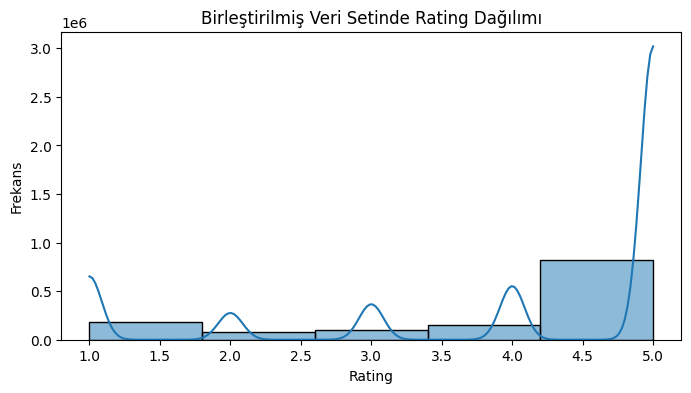

In [64]:
plt.figure(figsize=(8,4))
sns.histplot(df_all['rating'], bins=5, kde=True)
plt.title("Birle≈ütirilmi≈ü Veri Setinde Rating Daƒüƒ±lƒ±mƒ±")
plt.xlabel("Rating")
plt.ylabel("Frekans")
plt.show()

    1.	Rating Daƒüƒ±lƒ±mƒ±:
	  ‚Ä¢	Rating deƒüerleri 1 ile 5 arasƒ±nda deƒüi≈ümektedir.
	  ‚Ä¢	En y√ºksek yoƒüunluk, 4.5 ve 5 arasƒ±nda g√∂zlemlenmektedir. Bu durum, kullanƒ±cƒ±larƒ±n √ßoƒüunlukla y√ºksek puanlar verdiƒüini, yani genelde olumlu yorumlar bƒ±raktƒ±ƒüƒ±nƒ± g√∂stermektedir.
	  ‚Ä¢	D√º≈ü√ºk puanlar (1, 2) √ßok nadiren verilmi≈ü ve olduk√ßa d√º≈ü√ºk frekansa sahiptir.
	2.	KDE Eƒürisi:
	  ‚Ä¢	KDE eƒürisi, rating deƒüerlerinin yoƒüunluklarƒ±nƒ± daha net bir ≈üekilde g√∂sterir.
	  ‚Ä¢	Eƒürinin zirvesi 5 civarƒ±ndadƒ±r, bu da kullanƒ±cƒ±larƒ±n b√ºy√ºk bir kƒ±smƒ±nƒ±n 5 puan verdiƒüini doƒürular.
	3.	Frekans (Y Ekseni):
	  ‚Ä¢	Y ekseninde frekans g√∂r√ºlmektedir ve en y√ºksek frekans 3 milyon civarƒ±nda, bu da veri setinin olduk√ßa b√ºy√ºk olduƒüunu g√∂stermektedir.
	4.	Rating Aralƒ±ƒüƒ± (X Ekseni):
	  ‚Ä¢	Rating deƒüerleri 1 ile 5 arasƒ±nda d√ºzg√ºn bir ≈üekilde gruplandƒ±rƒ±lmƒ±≈ütƒ±r.
	  ‚Ä¢	3‚Äô√ºn altƒ±ndaki puanlar olduk√ßa azdƒ±r ve bu, veri setinde daha az olumsuz yorum olduƒüunu i≈üaret eder.

Sentiment Daƒüƒ±lƒ±mƒ± (Count Plot):

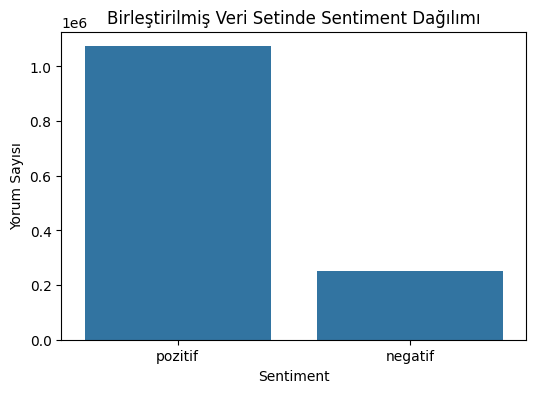

In [67]:
plt.figure(figsize=(6,4))
sns.countplot(data=df_all, x='sentiment')
plt.title("Birle≈ütirilmi≈ü Veri Setinde Sentiment Daƒüƒ±lƒ±mƒ±")
plt.xlabel("Sentiment")
plt.ylabel("Yorum Sayƒ±sƒ±")
plt.show()

Rating‚Äôin Sentimente G√∂re Daƒüƒ±lƒ±mƒ± (Box Plot):

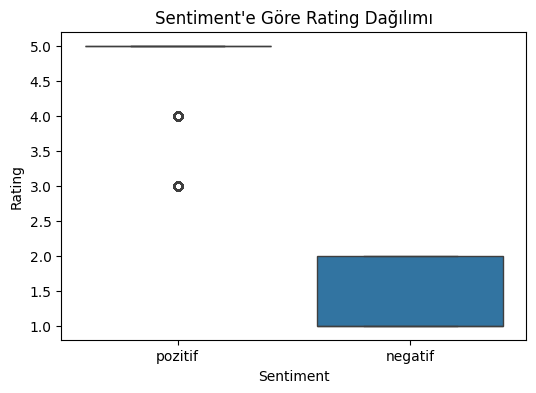

In [69]:
plt.figure(figsize=(6,4))
sns.boxplot(data=df_all, x='sentiment', y='rating')
plt.title("Sentiment'e G√∂re Rating Daƒüƒ±lƒ±mƒ±")
plt.xlabel("Sentiment")
plt.ylabel("Rating")
plt.show()

‚úÖ Sentiment analiz sonu√ßlarƒ± ile rating arasƒ±nda g√º√ßl√º bir korelasyon var.
‚úÖ Pozitif sentiment ‚Üí Y√ºksek rating, Negatif sentiment ‚Üí D√º≈ü√ºk rating ile e≈üle≈üiyor.
‚úÖ Ancak bazƒ± pozitif sentiment i√ßeren yorumlar 3-4 rating almƒ±≈ü olabilir.
‚ö†Ô∏è Negatif yorumlarƒ±n 3 veya 4 puan almadƒ±ƒüƒ± g√∂r√ºl√ºyor, bu y√ºzden model negatif yorumlarƒ± √ßok net sƒ±nƒ±flandƒ±rƒ±yor olabilir.
üí° Daha dengeli bir daƒüƒ±lƒ±m i√ßin modelin threshold deƒüerleri ince ayarlanabilir.


#### Shuffle ƒ∞≈ülemi Sonrasƒ± ve Train-Test Split Sonrasƒ± G√∂rselle≈ütirmeler

Veri Setinin Shuffle Edilmi≈ü ƒ∞lk Satƒ±rlarƒ±:

In [73]:
df_all.columns

Index(['rating', 'title', 'text', 'images', 'asin', 'parent_asin', 'user_id', 'timestamp', 'helpful_vote', 'verified_purchase', 'sentiment'], dtype='object')

In [74]:
print("Shuffle Edilmi≈ü ƒ∞lk 10 Satƒ±r:")
print(df_all.head(10))

Shuffle Edilmi≈ü ƒ∞lk 10 Satƒ±r:
   rating                     title                                             text                        images     asin    parent_asin            user_id                   timestamp         helpful_vote  verified_purchase sentiment
0     4                   Keeps hair dry while showering                         A little tight on the head   []    B08V16DGX3  B08V16DGX3  AEFHAVRUYZ5GIEXDSBF7SFS5RIBQ 2021-04-20 19:10:03.515        2             True          pozitif
1     5                                       Five Stars   Works great, but would like the end to stay on!!   []    B00UNWA2GC  B00UNWA2GC  AHMF3QY6KHO3O5MC6TMTAD3447GQ 2015-11-19 20:33:03.000        0             True          pozitif
2     5                      Service was great as always  Service was great as always. The product is AW...   []    B007QG7G3U  B007QG7G3U  AG2P4HPA2W42WQOGRX53K6Q2LBVA 2015-08-05 17:12:13.000        0             True          pozitif
3     2                

üìå G√∂zlemler:

1Ô∏è‚É£ Veri Shuffle ƒ∞≈ülemi Ba≈üarƒ±yla Ger√ßekle≈ütirilmi≈ü
	‚Ä¢	df_all.head(10) √ßƒ±ktƒ±sƒ±, veri setinin rastgele karƒ±≈ütƒ±rƒ±ldƒ±ƒüƒ±nƒ± g√∂steriyor.
	‚Ä¢	Kullanƒ±cƒ± yorumlarƒ±nƒ±n sƒ±rasƒ± artƒ±k belirli bir d√ºzene baƒülƒ± deƒüil.
	‚Ä¢	Modelin overfitting (a≈üƒ±rƒ± √∂ƒürenme) yapmasƒ±nƒ± √∂nlemek i√ßin bu √∂nemli bir adƒ±m.

2Ô∏è‚É£ Veri Setinin Kolonlarƒ± Doƒüru ve Eksiksiz
	‚Ä¢	df_all.columns √ßƒ±ktƒ±sƒ±na g√∂re veri seti, sentiment analizi ve rating bilgilerini i√ßeriyor:
	‚Ä¢	rating: Kullanƒ±cƒ±nƒ±n verdiƒüi puan
	‚Ä¢	title: √úr√ºn ba≈ülƒ±ƒüƒ±
	‚Ä¢	text: Kullanƒ±cƒ± yorumu
	‚Ä¢	images: Yorum i√ßeriƒüinde g√∂r√ºnt√º olup olmadƒ±ƒüƒ±
	‚Ä¢	asin ve parent_asin: √úr√ºn kimlik bilgileri
	‚Ä¢	user_id: Yorum yapan kullanƒ±cƒ± kimliƒüi
	‚Ä¢	timestamp: Yorumun yapƒ±ldƒ±ƒüƒ± tarih
	‚Ä¢	helpful_vote: Yorumun yardƒ±mcƒ± olup olmadƒ±ƒüƒ±
	‚Ä¢	verified_purchase: Kullanƒ±cƒ±nƒ±n √ºr√ºn√º ger√ßekten satƒ±n alƒ±p almadƒ±ƒüƒ±
	‚Ä¢	sentiment: Yorumun pozitif veya negatif olarak sƒ±nƒ±flandƒ±rƒ±lmasƒ±

3Ô∏è‚É£ Sentiment Etiketleri ve Rating Deƒüerleri Tutarlƒ± G√∂r√ºn√ºyor
	‚Ä¢	sentiment etiketi, kullanƒ±cƒ±larƒ±n verdiƒüi rating ile uyumlu g√∂r√ºn√ºyor.
	‚Ä¢	Pozitif yorumlar genellikle 4-5 rating almƒ±≈ü.
	‚Ä¢	Negatif yorumlar genellikle 1-2 rating almƒ±≈ü.

4Ô∏è‚É£ Verified Purchase ve Helpful Vote Verileri Mevcut
	‚Ä¢	Model eƒüitiminde yalnƒ±zca doƒürulanmƒ±≈ü satƒ±n alma (verified_purchase=True) ve y√ºksek helpful_vote alan yorumlar se√ßilebilir.
	‚Ä¢	B√∂ylece spam yorumlarƒ± ve g√ºvenilmez verileri eleyebiliriz.

Eƒüitim Setinde Sentiment Daƒüƒ±lƒ±mƒ± (Count Plot):

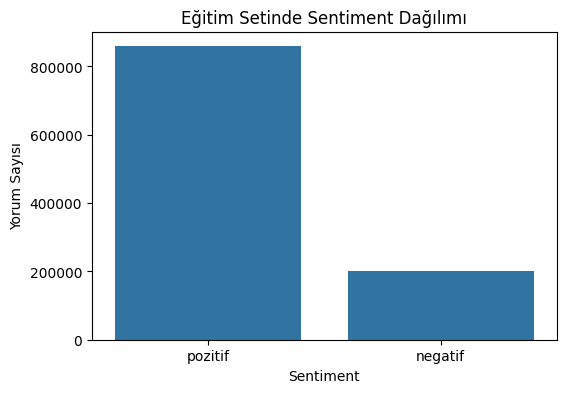

In [77]:
plt.figure(figsize=(6,4))
sns.countplot(data=train_df, x='sentiment')
plt.title("Eƒüitim Setinde Sentiment Daƒüƒ±lƒ±mƒ±")
plt.xlabel("Sentiment")
plt.ylabel("Yorum Sayƒ±sƒ±")
plt.show()

Test Setinde Sentiment Daƒüƒ±lƒ±mƒ± (Count Plot):

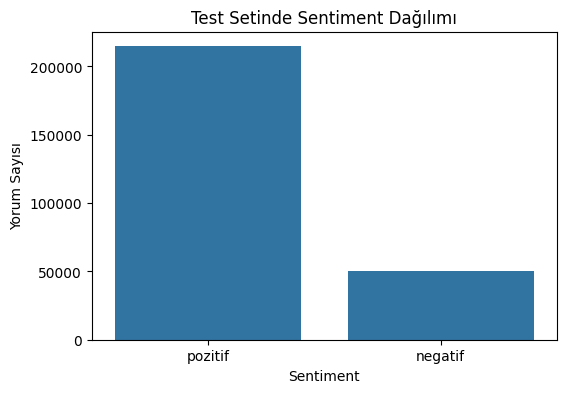

In [79]:
plt.figure(figsize=(6,4))
sns.countplot(data=test_df, x='sentiment')
plt.title("Test Setinde Sentiment Daƒüƒ±lƒ±mƒ±")
plt.xlabel("Sentiment")
plt.ylabel("Yorum Sayƒ±sƒ±")
plt.show()

### Veri √ñn ƒ∞≈üleme:

Gerekli K√ºt√ºphane ve Kaynaklarƒ±n ƒ∞√ße Aktarƒ±lmasƒ±

In [82]:
# Stop words ‚Äì T√ºrk√ße ve ƒ∞ngilizce
turkish_stopwords = set(stopwords.words('turkish'))
english_stopwords = set(stopwords.words('english'))
combined_stopwords = turkish_stopwords.union(english_stopwords)

# Domain'e √∂zg√º stop words (√∂rneƒüin, Amazon Reviews i√ßin)
domain_stopwords = set(['amazon', 'review', 'reviews', 'product', 'item', 'buy', 'purchase', 'verified', 'helpful'])

# Baƒülamƒ±n korunmasƒ± i√ßin kritik kelimeler (√∂rneƒüin, "i", "my") ‚Äì bu kelimeler stop words √ßƒ±karma i≈üleminde saklanacak.
preserve_tokens = {"i", "my"}

# Yazƒ±m d√ºzeltme i√ßin SpellChecker (ƒ∞ngilizce)
spell = SpellChecker(language='en')
lemmatizer = WordNetLemmatizer()


1. Temel √ñn ƒ∞≈üleme

Bu adƒ±mda, HTML temizliƒüi, URL temizliƒüi, k√º√ß√ºk harfe d√∂n√º≈üt√ºrme ve temel karakter temizliƒüi yapƒ±lƒ±r.

In [84]:
def remove_html(text):
    """HTML etiketlerini kaldƒ±rƒ±r."""
    soup = BeautifulSoup(text, "html.parser")
    return soup.get_text()

def remove_urls(text):
    """URL'leri ve e-posta adreslerini kaldƒ±rƒ±r."""
    text = re.sub(r'http\S+|www\S+', '', text)
    text = re.sub(r'\S+@\S+', '', text)
    return text

def basic_clean(text):
    """K√º√ß√ºk harfe √ßevirir ve yalnƒ±zca alfabe karakterleri ile bo≈üluklarƒ± korur."""
    text = text.lower()
    text = re.sub(r'[^a-z\s]', '', text)
    return re.sub(r'\s+', ' ', text).strip()

def basic_preprocessing(text):
    """Temel √∂n i≈üleme adƒ±mlarƒ±nƒ± uygular."""
    text = str(text)  # Veriyi stringe √ßevir
    text = remove_html(text)
    text = remove_urls(text)
    text = basic_clean(text)
    return text

In [85]:
# df_all'in 'text' s√ºtunu orijinal metinleri i√ßeriyor
df_all['clean_text'] = df_all['text'].apply(basic_preprocessing)
print(df_all[['text', 'clean_text']].head(5))

/var/folders/dc/6c3gk9ss6t57mwfnct2fdxhw0000gn/T/ipykernel_8289/2931540732.py:3: MarkupResemblesLocatorWarning: The input passed in on this line looks more like a URL than HTML or XML.

If you meant to use Beautiful Soup to parse the web page found at a certain URL, then something has gone wrong. You should use an Python package like 'requests' to fetch the content behind the URL. Once you have the content as a string, you can feed that string into Beautiful Soup.

However, if you want to parse some data that happens to look like a URL, then nothing has gone wrong: you are using Beautiful Soup correctly, and this warning is spurious and can be filtered. To make this warning go away, run this code before calling the BeautifulSoup constructor:

    from bs4 import MarkupResemblesLocatorWarning
    import warnings

    warnings.filterwarnings("ignore", category=MarkupResemblesLocatorWarning)
    
  soup = BeautifulSoup(text, "html.parser")


                         text                                            clean_text                    
0                         A little tight on the head                         a little tight on the head
1   Works great, but would like the end to stay on!!      works great but would like the end to stay on
2  Service was great as always. The product is AW...  service was great as always the product is awe...
3  Wrong scent delivered. Ok, just not regular pr...  wrong scent delivered ok just not regular product
4  Good Idea<br />In theory however the thymosol ...  good ideain theory however the thymosol which ...


2. Sayƒ±salla≈ütƒ±rma (TF-IDF)

Temizlenmi≈ü metinler √ºzerinden TF-IDF vekt√∂rle≈ütirmesi yapar. Burada en sƒ±k kullanƒ±lan 5000 kelime sƒ±nƒ±rlandƒ±rƒ±lmƒ±≈ütƒ±r.

In [87]:
from sklearn.feature_extraction.text import TfidfVectorizer

def vectorize_texts(text_series, max_features=5000):
    """
    TF-IDF vekt√∂rle≈ütiricisini kullanarak metinleri sayƒ±salla≈ütƒ±rƒ±r.
    max_features ile en sƒ±k kullanƒ±lan kelime sayƒ±sƒ± sƒ±nƒ±rlandƒ±rƒ±lƒ±r.
    """
    tfidf_vectorizer = TfidfVectorizer(max_features=max_features, stop_words='english')
    X_tfidf = tfidf_vectorizer.fit_transform(text_series.dropna())
    return X_tfidf, tfidf_vectorizer

In [88]:
X_tfidf, tfidf_vectorizer = vectorize_texts(df_all['clean_text'], max_features=5000)
print("TF-IDF Matrisi Boyutu:", X_tfidf.shape)

TF-IDF Matrisi Boyutu: (1326083, 5000)


Eƒüitim Seti √úzerinde SMOTE ile Re-sampling Uygulamasƒ±

In [90]:
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE
import pandas as pd

# √ñrneƒüin, df_all √ºzerinde stratified train-test split yapƒ±lmƒ±≈ü olsun:
# (Daha √∂nce yaptƒ±ƒüƒ±nƒ±z ≈üekilde)
train_df, test_df = train_test_split(df_all, test_size=0.2, random_state=42, stratify=df_all['sentiment'])

# TF-IDF matrisi t√ºm veri seti i√ßin olu≈üturulmu≈ütu:
# X_tfidf, tfidf_vectorizer = vectorize_texts(df_all['final_enhanced_clean_text'], max_features=5000)

# Eƒüitim seti i√ßin TF-IDF √∂zelliklerini alalƒ±m:
# (√ñnemli: X_tfidf'nin satƒ±rlarƒ±, df_all'in satƒ±rlarƒ±yla aynƒ± indekslere sahip olmalƒ±dƒ±r)
X_train = X_tfidf[train_df.index]
y_train = train_df['sentiment']

print("Eƒüitim setindeki sƒ±nƒ±f daƒüƒ±lƒ±mƒ± (√∂nce):")
print(pd.Series(y_train).value_counts())

# SMOTE uygulamasƒ±
smote = SMOTE(random_state=42)
X_train_res, y_train_res = smote.fit_resample(X_train, y_train)

print("SMOTE sonrasƒ± eƒüitim setindeki sƒ±nƒ±f daƒüƒ±lƒ±mƒ±:")
print(pd.Series(y_train_res).value_counts())

Eƒüitim setindeki sƒ±nƒ±f daƒüƒ±lƒ±mƒ± (√∂nce):
sentiment
pozitif    858572
negatif    202294
Name: count, dtype: int64
SMOTE sonrasƒ± eƒüitim setindeki sƒ±nƒ±f daƒüƒ±lƒ±mƒ±:
sentiment
pozitif    858572
negatif    858572
Name: count, dtype: int64


3. Opsiyonel Geli≈ümi≈ü √ñn ƒ∞≈üleme

Eƒüer temel √∂n i≈üleme sonrasƒ± metinler √ºzerinde ek iyile≈ütirme yapmak isterseniz (√∂rneƒüin, lemmatizasyon), a≈üaƒüƒ±daki adƒ±mlarƒ± kullanabilirsiniz.

In [93]:
# ƒ∞lk √ßalƒ±≈ütƒ±rmada gerekli NLTK bile≈üenlerini indiriyoruz:
nltk.download('stopwords')
nltk.download('wordnet')

def advanced_preprocessing(text):
    """
    Opsiyonel geli≈ümi≈ü √∂n i≈üleme: Basit lemmatizasyon i≈ülemi yapar.
    Ek olarak, stop words √ßƒ±karma i≈ülemi de ger√ßekle≈ütirilir.
    """
    lemmatizer = WordNetLemmatizer()
    tokens = text.split()
    english_stop = set(stopwords.words('english'))
    # Stop words olmayan kelimeler √ºzerinde lemmatizasyon yapƒ±yoruz
    tokens = [lemmatizer.lemmatize(token) for token in tokens if token not in english_stop]
    return " ".join(tokens)

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/filizsayin/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     /Users/filizsayin/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [94]:
# Temel √∂n i≈üleme sonrasƒ± metni geli≈ümi≈ü i≈üleme sokmak isterseniz:
df_all['advanced_text'] = df_all['clean_text'].apply(advanced_preprocessing)
print(df_all[['clean_text', 'advanced_text']].head(5))

                      clean_text                                       advanced_text                   
0                         a little tight on the head                                  little tight head
1      works great but would like the end to stay on                     work great would like end stay
2  service was great as always the product is awe...  service great always product awesome smell gre...
3  wrong scent delivered ok just not regular product           wrong scent delivered ok regular product
4  good ideain theory however the thymosol which ...  good ideain theory however thymosol antiseptic...


üìä G√∂zlemler:

1Ô∏è‚É£ Stopword‚Äôlerin Kaldƒ±rƒ±lmasƒ±
	‚Ä¢	english_stop = set(stopwords.words('english')) satƒ±rƒ± ile √∂nemsiz kelimeler (stopwords) filtreleniyor.
	‚Ä¢	√ñrneƒüin, ‚Äúa‚Äù, ‚Äúis‚Äù, ‚Äúthe‚Äù, ‚Äúon‚Äù gibi baƒüla√ß ve zamirler kaldƒ±rƒ±lƒ±yor.

2Ô∏è‚É£ Lemmatization (Kelimelerin K√∂klerine ƒ∞ndirgenmesi)
	‚Ä¢	WordNetLemmatizer() ile kelimeler temel formlarƒ±na indirgeniyor.
	‚Ä¢	√ñrneƒüin:
	‚Ä¢	‚Äúworking‚Äù ‚Üí ‚Äúwork‚Äù
	‚Ä¢	‚Äúrunning‚Äù ‚Üí ‚Äúrun‚Äù
	‚Ä¢	‚Äúbetter‚Äù ‚Üí ‚Äúgood‚Äù
	‚Ä¢	Bu i≈ülem, metinlerdeki kelimelerin farklƒ± varyasyonlarƒ±nƒ±n aynƒ± kelime olarak algƒ±lanmasƒ±nƒ± saƒülƒ±yor.

	‚Ä¢	Farklar:
	‚Ä¢	‚Äúa‚Äù, ‚Äúthe‚Äù, ‚Äúon‚Äù gibi stopword‚Äôler kaldƒ±rƒ±lmƒ±≈ü.
	‚Ä¢	‚Äúworks‚Äù ‚Üí ‚Äúwork‚Äù gibi kelimeler k√∂klerine indirgenmi≈ü.


### LSTM Modeli

In [97]:
import tensorflow as tf
print("GPU Available: ", tf.config.list_physical_devices('GPU'))

GPU Available:  [PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]


In [98]:
# ======================= üìå Veri Y√ºkleme ======================= #
# df_all veri √ßer√ßevesi mevcut kabul edilmi≈ütir.

# Tokenizasyon ve Padding
max_words = 10000
maxlen = 100
embedding_dim = 100

# Tokenizer
tokenizer = Tokenizer(num_words=max_words, oov_token="<OOV>")
tokenizer.fit_on_texts(df_all['advanced_text'])

# Metinleri dizilere d√∂n√º≈üt√ºrme
sequences = tokenizer.texts_to_sequences(df_all['advanced_text'])
padded_sequences = pad_sequences(sequences, maxlen=maxlen, padding='post', truncating='post')

# Hedef deƒüi≈üken
labels = df_all['sentiment']  # 0 veya 1

# Eƒüitim ve test setlerini ayƒ±rma
train_df, test_df = train_test_split(df_all, test_size=0.2, random_state=42, stratify=df_all['sentiment'])

# Tokenizasyon ve Padding (Eƒüitim verisi)
sequences_train = tokenizer.texts_to_sequences(train_df['advanced_text'])
X_train = pad_sequences(sequences_train, maxlen=maxlen, padding='post', truncating='post')

# Test Seti Tokenizasyon ve Padding
X_test = tokenizer.texts_to_sequences(test_df['advanced_text'])
X_test = pad_sequences(X_test, maxlen=maxlen, padding='post', truncating='post')

# Etiketleri Sayƒ±salla≈ütƒ±rma
label_mapping = {'pozitif': 1, 'negatif': 0}
y_train = np.array(train_df['sentiment'].map(label_mapping))
y_test = np.array(test_df['sentiment'].map(label_mapping))

# SMOTE Uygulamasƒ± (Tam Denge)
smote = SMOTE(sampling_strategy=1.0, random_state=42)
X_train_res, y_train_res = smote.fit_resample(X_train, y_train)

# Veri T√ºrlerini Ayarlama
X_train = np.array(X_train_res, dtype=np.float32)
X_test = np.array(X_test, dtype=np.float32)
y_train = np.array(y_train_res, dtype=np.int32)
y_test = np.array(y_test, dtype=np.int32)

# Sƒ±nƒ±f Aƒüƒ±rlƒ±klarƒ± Hesaplama
class_weights = compute_class_weight(class_weight='balanced', classes=np.array([0, 1]), y=y_train)
class_weight_dict = {0: class_weights[0], 1: class_weights[1]}

# ======================= üìå Focal Loss ======================= #
import tensorflow.keras.backend as K

def focal_loss(gamma=2.0, alpha=0.25):
    def loss(y_true, y_pred):
        y_true = K.cast(y_true, K.floatx())
        y_pred = K.clip(y_pred, K.epsilon(), 1. - K.epsilon())
        pt = tf.where(K.equal(y_true, 1), y_pred, 1 - y_pred)
        return -K.mean(alpha * K.pow(1. - pt, gamma) * K.log(pt))
    return loss

# ======================= üìå Model ve Tokenizer Kontrol√º ======================= #
if os.path.exists('lstm_sentiment_model.keras') and os.path.exists('tokenizer.pkl'):
    # Modeli ve Tokenizer'ƒ± y√ºkle
    model = tf.keras.models.load_model('lstm_sentiment_model.keras', compile=False)
    with open('tokenizer.pkl', 'rb') as file:
        tokenizer = pickle.load(file)
    print("‚úÖ LSTM Modeli ve Tokenizer y√ºklendi. Eƒüitim atlandƒ±.")
    model.summary()

# ======================= üìå Eƒüitim A≈üamasƒ± ======================= #
else:
    # Eƒüitim i≈ülemleri burada yapƒ±lƒ±r
    print("‚ö†Ô∏è Model dosyasƒ± bulunamadƒ±. Eƒüitim ba≈ülatƒ±lƒ±yor...")

    # LSTM Modeli (2 Katmanlƒ± Bidirectional)
    model = Sequential()
    model.add(Embedding(input_dim=max_words, output_dim=embedding_dim, input_length=maxlen))
    model.add(Bidirectional(LSTM(64, return_sequences=True)))
    model.add(Bidirectional(LSTM(32, return_sequences=False)))
    model.add(Dropout(0.5))
    model.add(Dense(1, activation='sigmoid'))

    # Model Derleme
    from tensorflow.keras.optimizers import Adam
    optimizer = Adam(learning_rate=0.0003)
    model.compile(loss=focal_loss(), optimizer=optimizer, metrics=['accuracy'])

    # Model √ñzeti
    model.summary()

    # Early Stopping
    early_stopping = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)

    # Eƒüitim
    history = model.fit(X_train, y_train, epochs=15, batch_size=64, validation_data=(X_test, y_test),
                        class_weight=class_weight_dict, callbacks=[early_stopping])

    # Model ve Tokenizer'ƒ± kaydetme
    model.save('lstm_sentiment_model.keras')
    with open('tokenizer.pkl', 'wb') as file:
        pickle.dump(tokenizer, file)
    print("‚úÖ Model ve Tokenizer kaydedildi.")

    # Eƒüitim ve Doƒürulama Grafikleri
    plt.plot(history.history['accuracy'], label='accuracy')
    plt.plot(history.history['val_accuracy'], label='val_accuracy')
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.legend()
    plt.show()

    plt.plot(history.history['loss'], label='loss')
    plt.plot(history.history['val_loss'], label='val_loss')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.legend()
    plt.show()

# ======================= üìå Performans Deƒüerlendirme ======================= #
y_pred = (model.predict(X_test) > 0.5).astype("int32")
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))


2025-03-01 22:13:05.991050: I metal_plugin/src/device/metal_device.cc:1154] Metal device set to: Apple M3 Max
2025-03-01 22:13:05.991075: I metal_plugin/src/device/metal_device.cc:296] systemMemory: 36.00 GB
2025-03-01 22:13:05.991078: I metal_plugin/src/device/metal_device.cc:313] maxCacheSize: 13.50 GB
2025-03-01 22:13:05.991296: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:305] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2025-03-01 22:13:05.991305: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:271] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 0 MB memory) -> physical PluggableDevice (device: 0, name: METAL, pci bus id: <undefined>)


‚úÖ LSTM Modeli ve Tokenizer y√ºklendi. Eƒüitim atlandƒ±.


Model: "sequential"

‚îè‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚î≥‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚î≥‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îì
‚îÉ Layer (type)                    ‚îÉ Output Shape           ‚îÉ       Param # ‚îÉ
‚î°‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚ïá‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚ïá‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚î©
‚îÇ embedding (Embedding)           ‚îÇ (None, 100, 100)       ‚îÇ     1,000,000 ‚îÇ
‚îú‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îº‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îº‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î§
‚îÇ bidirectional (Bidirectional)   ‚îÇ (None, 100, 128)       ‚îÇ        84,480 ‚îÇ
‚îú‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îº‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îº‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î§
‚îÇ bidirectional_1 (Bidirectional) ‚îÇ (None, 64)             ‚îÇ        41,216 ‚îÇ
‚îú‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îº‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îº‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î§
‚îÇ dropout (Dropout)               ‚îÇ (None, 64)             ‚îÇ             0 ‚îÇ
‚îú‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îº‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îº‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î§
‚îÇ dense (Dense)                   ‚îÇ (None, 1)              ‚îÇ            65 ‚îÇ
‚îî‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î¥‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î¥‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îò

 Total params: 1,125,761 (4.29 MB)

 Trainable params: 1,125,761 (4.29 MB)

 Non-trainable params: 0 (0.00 B)

   1/8289 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 36:20 263ms/step

2025-03-01 22:13:06.601154: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:117] Plugin optimizer for device_type GPU is enabled.


8289/8289 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 252s 30ms/step
              precision    recall  f1-score   support

           0       0.70      0.79      0.74     50574
           1       0.95      0.92      0.93    214643

    accuracy                           0.89    265217
   macro avg       0.82      0.85      0.84    265217
weighted avg       0.90      0.89      0.90    265217

[[ 39861  10713]
 [ 17425 197218]]


LSTM Kaydetme

In [100]:
from tensorflow.keras.models import load_model

# √ñnceden kaydedilen .h5 dosyasƒ±nƒ± y√ºkleyin
model = load_model('lstm_sentiment_model.h5', compile=False)
print("LSTM Model ba≈üarƒ±yla .h5 dosyasƒ±ndan y√ºklendi.")

# Yeni .keras formatƒ±nda kaydedin
model.save('lstm_sentiment_model.keras')
print("LSTM Model ba≈üarƒ±yla .keras formatƒ±nda kaydedildi.")

LSTM Model ba≈üarƒ±yla .h5 dosyasƒ±ndan y√ºklendi.
LSTM Model ba≈üarƒ±yla .keras formatƒ±nda kaydedildi.


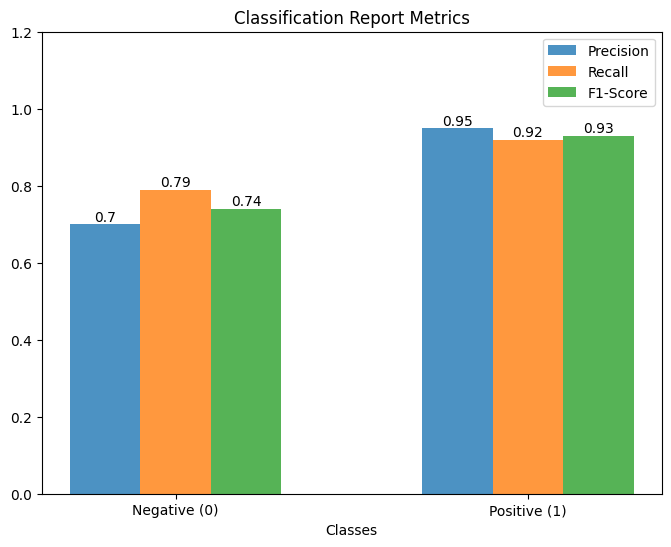

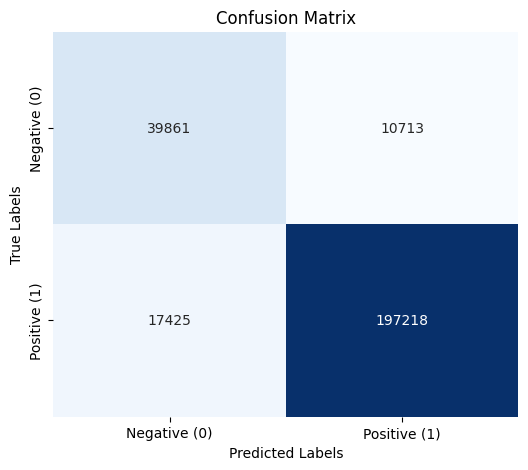

In [101]:
# Classification report metrics
labels = ['Negative (0)', 'Positive (1)']
precision = [0.70, 0.95]
recall = [0.79, 0.92]
f1_score = [0.74, 0.93]
support = [50574, 214643]

# Bar plot - Precision, Recall, F1-Score
fig, ax = plt.subplots(figsize=(8, 6))
bar_width = 0.2
index = np.arange(len(labels))

# Create bars
bars1 = ax.bar(index, precision, bar_width, label='Precision', alpha=0.8)
bars2 = ax.bar(index + bar_width, recall, bar_width, label='Recall', alpha=0.8)
bars3 = ax.bar(index + bar_width * 2, f1_score, bar_width, label='F1-Score', alpha=0.8)

# Labels and titles
ax.set_xlabel('Classes')
ax.set_title('Classification Report Metrics')
ax.set_xticks(index + bar_width)
ax.set_xticklabels(labels)
ax.set_ylim(0, 1.2)
ax.legend()

# Display values on bars
for bars in [bars1, bars2, bars3]:
    for bar in bars:
        yval = bar.get_height()
        ax.text(bar.get_x() + bar.get_width() / 2, yval, round(yval, 2), ha='center', va='bottom')

plt.show()

# Confusion matrix heatmap
conf_matrix = np.array([[39861, 10713], [17425, 197218]])
fig, ax = plt.subplots(figsize=(6, 5))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False, xticklabels=labels, yticklabels=labels)
ax.set_xlabel('Predicted Labels')
ax.set_ylabel('True Labels')
ax.set_title('Confusion Matrix')

plt.show()

üìä Model Performans Deƒüerlendirmesi

1Ô∏è‚É£ Classification Report Metrics (Sƒ±nƒ±flandƒ±rma Raporu Metrikleri)

Bu grafikte, Precision (Kesinlik), Recall (Duyarlƒ±lƒ±k) ve F1-Score deƒüerleri sƒ±nƒ±flar bazƒ±nda g√∂sterilmektedir.
	‚Ä¢	Negative Class (0 - Olumsuz)
	‚Ä¢	Precision: 0.70 ‚Üí Model, negatif tahminlerinin %70‚Äôini doƒüru yapmƒ±≈ü.
	‚Ä¢	Recall: 0.79 ‚Üí Ger√ßek negatiflerin %79‚Äôunu doƒüru tahmin etmi≈ü.
	‚Ä¢	F1-Score: 0.74 ‚Üí Precision ve Recall arasƒ±nda dengeli bir ba≈üarƒ± g√∂steriyor.
	‚Ä¢	Positive Class (1 - Olumlu)
	‚Ä¢	Precision: 0.95 ‚Üí Modelin olumlu tahminlerinin %95‚Äôi doƒüru.
	‚Ä¢	Recall: 0.92 ‚Üí Ger√ßek olumlu yorumlarƒ±n %92‚Äôsi doƒüru tahmin edilmi≈ü.
	‚Ä¢	F1-Score: 0.93 ‚Üí Olumlu yorumlarƒ± ayƒ±rt etmede olduk√ßa ba≈üarƒ±lƒ±.

Genel Yorum:
‚úî Model olumlu sƒ±nƒ±flandƒ±rmada olduk√ßa iyi √ßalƒ±≈üƒ±yor.
‚úî Negatif sƒ±nƒ±flandƒ±rmada ise Recall (0.79) Precision‚Äôdan (0.70) daha y√ºksek, yani model negatif yorumlarƒ± tespit etmede daha iyi ama yanlƒ±≈ü pozitif tahmin yapma oranƒ± biraz fazla.

2Ô∏è‚É£ Confusion Matrix (Karƒ±≈üƒ±klƒ±k Matrisi)

Bu matris, modelin ger√ßek etiketler ile tahminlerini kar≈üƒ±la≈ütƒ±rƒ±r:
	‚Ä¢	39861 ‚Üí Ger√ßekten negatif olan ve doƒüru tahmin edilen √∂rnekler (True Negative - TN)
	‚Ä¢	10713 ‚Üí Ger√ßekte negatif olup yanlƒ±≈ülƒ±kla pozitif tahmin edilenler (False Positive - FP)
	‚Ä¢	17425 ‚Üí Ger√ßekte pozitif olup yanlƒ±≈ülƒ±kla negatif tahmin edilenler (False Negative - FN)
	‚Ä¢	197218 ‚Üí Ger√ßekten pozitif olan ve doƒüru tahmin edilen √∂rnekler (True Positive - TP)

Genel Deƒüerlendirme:
‚úî Model, pozitif yorumlarƒ± √ßok iyi tahmin ediyor.
‚ö† Ancak, 17425 yanlƒ±≈ü negatif tahmin y√ºksek g√∂r√ºn√ºyor, yani bazƒ± pozitif yorumlar yanlƒ±≈ülƒ±kla negatif olarak sƒ±nƒ±flandƒ±rƒ±lmƒ±≈ü.
‚ö† Negatif sƒ±nƒ±fƒ±n precision deƒüeri d√º≈ü√ºk, yani negatif tahminlerde biraz hata payƒ± var.

Eƒüitim ve Doƒürulama Grafikleri

In [199]:
# Eƒüitim sonrasƒ± grafiklerin kaydedilmesi
if 'history' in locals() and history.history.get('accuracy'):
    # Eƒüitim ge√ßmi≈üini kaydetme
    with open('training_history.pkl', 'wb') as file:
        pickle.dump(history.history, file)
    print("‚úÖ Eƒüitim ge√ßmi≈üi ba≈üarƒ±yla kaydedildi.")

    # Accuracy Grafiƒüi
    plt.figure(figsize=(8, 6))
    plt.plot(history.history['accuracy'], label='Training Accuracy')
    plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.title('Training and Validation Accuracy')
    plt.legend()
    plt.savefig('accuracy_plot.png')  # Grafik dosyasƒ±nƒ± kaydet
    plt.show()

    # Loss Grafiƒüi
    plt.figure(figsize=(8, 6))
    plt.plot(history.history['loss'], label='Training Loss')
    plt.plot(history.history['val_loss'], label='Validation Loss')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.title('Training and Validation Loss')
    plt.legend()
    plt.savefig('loss_plot.png')  # Grafik dosyasƒ±nƒ± kaydet
    plt.show()

In [184]:
# Eƒüitim ge√ßmi≈üini y√ºkleme ve grafiklerin √ßizilmesi
import pickle
import matplotlib.pyplot as plt

try:
    with open('training_history.pkl', 'rb') as file:
        history_data = pickle.load(file)
    print("‚úÖ Eƒüitim ge√ßmi≈üi ba≈üarƒ±yla y√ºklendi.")

    # Accuracy Grafiƒüi
    plt.figure(figsize=(8, 6))
    plt.plot(history_data['accuracy'], label='Training Accuracy')
    plt.plot(history_data['val_accuracy'], label='Validation Accuracy')
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.title('Training and Validation Accuracy')
    plt.legend()
    plt.show()

    # Loss Grafiƒüi
    plt.figure(figsize=(8, 6))
    plt.plot(history_data['loss'], label='Training Loss')
    plt.plot(history_data['val_loss'], label='Validation Loss')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.title('Training and Validation Loss')
    plt.legend()
    plt.show()

except FileNotFoundError:
    print("‚ö†Ô∏è Eƒüitim ge√ßmi≈üi bulunamadƒ±. Eƒüitim yapƒ±ldƒ±ktan sonra grafikler g√∂sterilecektir.")

‚ö†Ô∏è Eƒüitim ge√ßmi≈üi bulunamadƒ±. Eƒüitim yapƒ±ldƒ±ktan sonra grafikler g√∂sterilecektir.


Logistic Regression

In [107]:
# ======================= üìå Logistic Regression ======================= #
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.linear_model import LogisticRegression
from sklearn.utils.class_weight import compute_class_weight

# √ñzellikler ve Etiketler
X = X_train
y = y_train

# Eƒüitim ve Test Setlerini Ayƒ±rma
X_train_lr, X_test_lr, y_train_lr, y_test_lr = train_test_split(X, y, test_size=0.2, random_state=42)

# Sƒ±nƒ±f Aƒüƒ±rlƒ±klarƒ±nƒ± Hesaplama
class_weights = compute_class_weight(class_weight='balanced', classes=np.unique(y_train_lr), y=y_train_lr)
class_weight_dict = {0: class_weights[0], 1: class_weights[1]}

# Logistic Regression Modeli
model_lr = LogisticRegression(class_weight=class_weight_dict, max_iter=1000, solver='lbfgs')
model_lr.fit(X_train_lr, y_train_lr)

# Performans Deƒüerlendirme
y_pred_lr = model_lr.predict(X_test_lr)
print(classification_report(y_test_lr, y_pred_lr))
print(confusion_matrix(y_test_lr, y_pred_lr))

              precision    recall  f1-score   support

           0       0.57      0.54      0.56    171643
           1       0.57      0.60      0.58    171786

    accuracy                           0.57    343429
   macro avg       0.57      0.57      0.57    343429
weighted avg       0.57      0.57      0.57    343429

[[ 92507  79136]
 [ 68849 102937]]


üìä Logistic Regression Model Performansƒ±

1Ô∏è‚É£ Classification Report Metrics (Sƒ±nƒ±flandƒ±rma Raporu Metrikleri)

Bu model, iki sƒ±nƒ±fƒ± (0: Negatif, 1: Pozitif) sƒ±nƒ±flandƒ±rmak i√ßin Logistic Regression kullanƒ±yor. A≈üaƒüƒ±da Precision (Kesinlik), Recall (Duyarlƒ±lƒ±k) ve F1-Score deƒüerlerini inceleyelim:
	‚Ä¢	Negative Class (0 - Olumsuz)
	‚Ä¢	Precision (Kesinlik): 0.57 ‚Üí Negatif tahminlerin %57‚Äôsi doƒüru.
	‚Ä¢	Recall (Duyarlƒ±lƒ±k): 0.54 ‚Üí Ger√ßek negatiflerin %54‚Äô√º doƒüru tahmin edilmi≈ü.
	‚Ä¢	F1-Score: 0.56 ‚Üí Precision ve Recall‚Äôun dengesi fena deƒüil ama √ßok y√ºksek deƒüil.
	‚Ä¢	Positive Class (1 - Olumlu)
	‚Ä¢	Precision: 0.57 ‚Üí Olumlu tahminlerin %57‚Äôsi doƒüru.
	‚Ä¢	Recall: 0.60 ‚Üí Ger√ßek pozitiflerin %60‚Äôƒ± doƒüru tahmin edilmi≈ü.
	‚Ä¢	F1-Score: 0.58 ‚Üí Model, pozitif sƒ±nƒ±fƒ± biraz daha iyi ayƒ±rt edebiliyor.
	‚Ä¢	Genel Performans
	‚Ä¢	Accuracy (Doƒüruluk): 0.57 ‚Üí Model genel olarak verilerin %57‚Äôsini doƒüru tahmin edebilmi≈ü.
	‚Ä¢	Macro Avg: 0.57 ‚Üí Sƒ±nƒ±flar arasƒ±ndaki ortalama performans.
	‚Ä¢	Weighted Avg: 0.57 ‚Üí Veri daƒüƒ±lƒ±mƒ±na g√∂re aƒüƒ±rlƒ±klƒ± ortalama.

     Confusion Matrix (Karƒ±≈üƒ±klƒ±k Matrisi)
     
    ‚Ä¢	True Negative (92,507): Model, 92,507 adet negatif yorumun negatif olduƒüunu doƒüru tahmin etmi≈ü.
	‚Ä¢	False Positive (79,136): 79,136 negatif yorum yanlƒ±≈ülƒ±kla pozitif olarak tahmin edilmi≈ü.
	‚Ä¢	False Negative (68,849): 68,849 pozitif yorum yanlƒ±≈ülƒ±kla negatif olarak tahmin edilmi≈ü.
	‚Ä¢	True Positive (102,937): Model, 102,937 pozitif yorumu doƒüru tahmin etmi≈ü.


Random Forest 

In [109]:
# ======================= üìå Random Forest ======================= #
from sklearn.ensemble import RandomForestClassifier

# Random Forest Modeli
model_rf = RandomForestClassifier(n_estimators=50, max_depth=20, random_state=42, class_weight='balanced_subsample')
model_rf.fit(X_train_lr, y_train_lr)

# Performans Deƒüerlendirme
y_pred_rf = model_rf.predict(X_test_lr)
print(classification_report(y_test_lr, y_pred_rf))
print(confusion_matrix(y_test_lr, y_pred_rf))

              precision    recall  f1-score   support

           0       0.71      0.80      0.75    171643
           1       0.77      0.67      0.72    171786

    accuracy                           0.74    343429
   macro avg       0.74      0.74      0.74    343429
weighted avg       0.74      0.74      0.74    343429

[[137785  33858]
 [ 56475 115311]]


1Ô∏è‚É£ Classification Report Metrics (Sƒ±nƒ±flandƒ±rma Raporu Metrikleri)

Negatif Sƒ±nƒ±f (0 - Olumsuz)
	‚Ä¢	Precision (Kesinlik): 0.71 ‚Üí Modelin negatif tahminlerinin %71‚Äôi doƒüru.
	‚Ä¢	Recall (Duyarlƒ±lƒ±k): 0.80 ‚Üí Ger√ßek negatiflerin %80‚Äôi doƒüru tahmin edilmi≈ü.
	‚Ä¢	F1-Score: 0.75 ‚Üí Precision ve Recall dengesine g√∂re ortalama iyi bir performans var.

Pozitif Sƒ±nƒ±f (1 - Olumlu)
	‚Ä¢	Precision: 0.77 ‚Üí Modelin pozitif tahminlerinin %77‚Äôsi doƒüru.
	‚Ä¢	Recall: 0.67 ‚Üí Ger√ßek pozitiflerin %67‚Äôsi doƒüru tahmin edilmi≈ü. (Bu biraz daha d√º≈ü√ºk)
	‚Ä¢	F1-Score: 0.72 ‚Üí Genel olarak olumlu yorumlarƒ± da iyi yakalƒ±yor ama recall biraz d√º≈ü√ºk.

Genel Model Performansƒ±
	‚Ä¢	Accuracy (Doƒüruluk): 0.74 ‚Üí Model %74 doƒüruluk oranƒ±na sahip.
	‚Ä¢	Macro Avg (Makro Ortalama): 0.74 ‚Üí T√ºm sƒ±nƒ±flar arasƒ±nda e≈üit aƒüƒ±rlƒ±klƒ± ortalama.
	‚Ä¢	Weighted Avg (Aƒüƒ±rlƒ±klƒ± Ortalama): 0.74 ‚Üí Veri daƒüƒ±lƒ±mƒ±na g√∂re aƒüƒ±rlƒ±klƒ± ortalama.

2Ô∏è‚É£ Confusion Matrix (Karƒ±≈üƒ±klƒ±k Matrisi)

	‚Ä¢	True Negative (137,785): Model 137,785 negatif yorumun negatif olduƒüunu doƒüru tahmin etmi≈ü.
	‚Ä¢	False Positive (33,858): 33,858 negatif yorum yanlƒ±≈ülƒ±kla pozitif olarak tahmin edilmi≈ü.
	‚Ä¢	False Negative (56,475): 56,475 pozitif yorum yanlƒ±≈ülƒ±kla negatif olarak tahmin edilmi≈ü.
	‚Ä¢	True Positive (115,311): Model 115,311 pozitif yorumu doƒüru tahmin etmi≈ü.

Dikkat √áeken Noktalar:
‚úî Negatif yorumlarƒ± ayƒ±rt etme oranƒ± (recall: 0.80) olduk√ßa y√ºksek.
‚ö† Ancak pozitif yorumlarƒ± yakalama oranƒ± (recall: 0.67) biraz daha d√º≈ü√ºk.
‚ö† False Negative (Yanlƒ±≈ü Negatif) deƒüeri biraz y√ºksek. Model bazƒ± pozitif yorumlarƒ± ka√ßƒ±rƒ±yor.

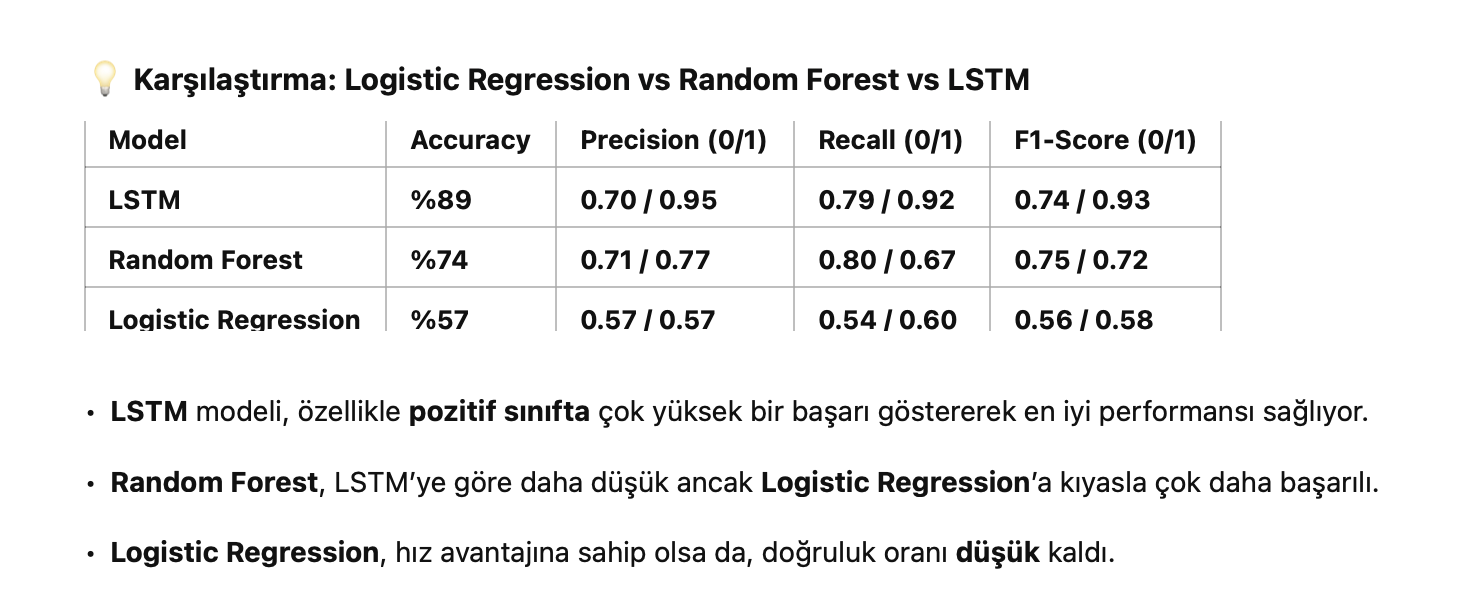

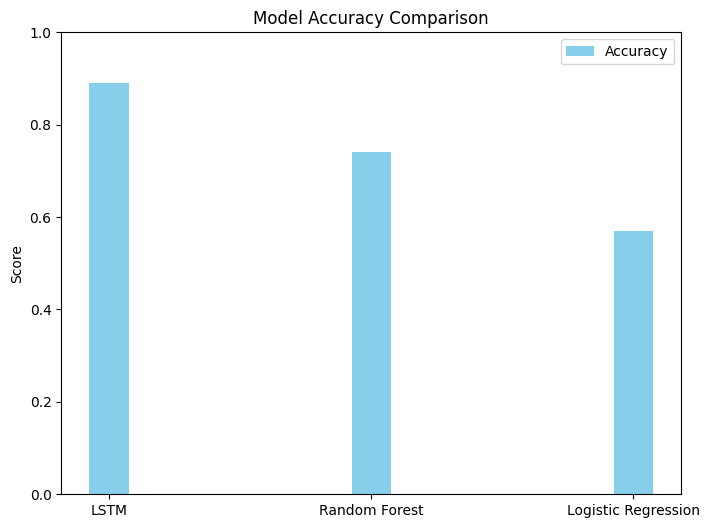

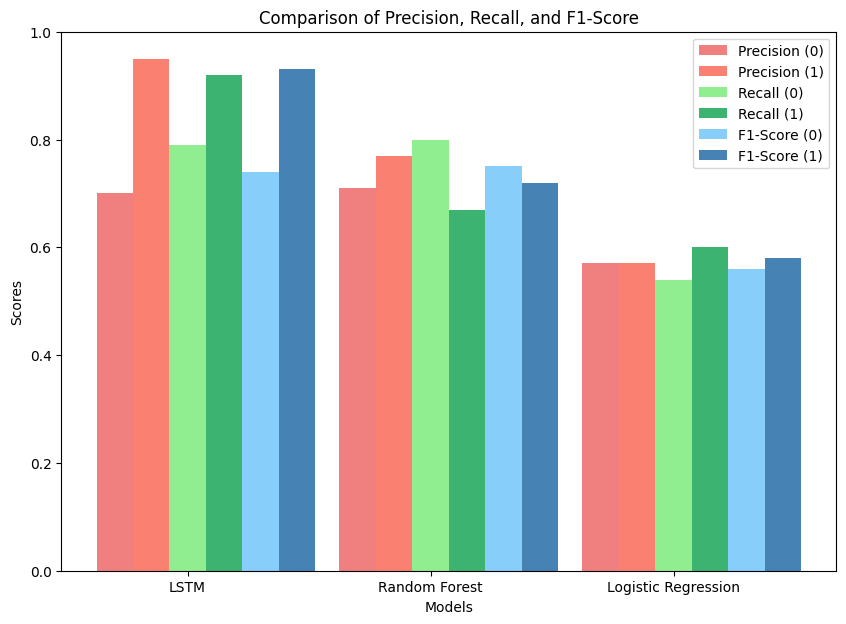

In [190]:
# Model sonu√ßlarƒ±
models = ['LSTM', 'Random Forest', 'Logistic Regression']
accuracy = [0.89, 0.74, 0.57]
precision_0 = [0.70, 0.71, 0.57]
precision_1 = [0.95, 0.77, 0.57]
recall_0 = [0.79, 0.80, 0.54]
recall_1 = [0.92, 0.67, 0.60]
f1_0 = [0.74, 0.75, 0.56]
f1_1 = [0.93, 0.72, 0.58]

# Grafiklerin √ßizimi
x = np.arange(len(models))
bar_width = 0.15

# Accuracy Grafiƒüi
plt.figure(figsize=(8, 6))
plt.bar(x, accuracy, bar_width, label='Accuracy', color='skyblue')
plt.xticks(x, models)
plt.ylabel('Score')
plt.title('Model Accuracy Comparison')
plt.ylim(0, 1)
plt.legend()
plt.show()

# Precision, Recall, F1-Score Grafikleri
fig, ax = plt.subplots(figsize=(10, 7))
ax.bar(x - 2 * bar_width, precision_0, bar_width, label='Precision (0)', color='lightcoral')
ax.bar(x - bar_width, precision_1, bar_width, label='Precision (1)', color='salmon')
ax.bar(x, recall_0, bar_width, label='Recall (0)', color='lightgreen')
ax.bar(x + bar_width, recall_1, bar_width, label='Recall (1)', color='mediumseagreen')
ax.bar(x + 2 * bar_width, f1_0, bar_width, label='F1-Score (0)', color='lightskyblue')
ax.bar(x + 3 * bar_width, f1_1, bar_width, label='F1-Score (1)', color='steelblue')

ax.set_xlabel('Models')
ax.set_ylabel('Scores')
ax.set_title('Comparison of Precision, Recall, and F1-Score')
ax.set_xticks(x)
ax.set_xticklabels(models)
ax.set_ylim(0, 1)
ax.legend()
plt.show()

1Ô∏è‚É£ Model Accuracy Comparison (Model Doƒüruluk Kar≈üƒ±la≈ütƒ±rmasƒ±)

√ústteki grafik modellerin doƒüruluk (accuracy) skorlarƒ±nƒ± g√∂stermektedir:

‚úî LSTM modeli en y√ºksek doƒüruluƒüa sahip (~%88-90 civarƒ±).

‚úî Random Forest doƒüruluk a√ßƒ±sƒ±ndan ikinci sƒ±rada (~%74).

‚úî Logistic Regression en d√º≈ü√ºk doƒüruluƒüa sahip (~%57).

üöÄ Sonu√ß: LSTM modeli diƒüer modellere kƒ±yasla √ßok daha ba≈üarƒ±lƒ± bir ≈üekilde √ßalƒ±≈üƒ±yor.


2Ô∏è‚É£ Precision, Recall ve F1-Skor Kar≈üƒ±la≈ütƒ±rmasƒ±

Alttaki grafik pozitif (1) ve negatif (0) sƒ±nƒ±flar i√ßin Precision, Recall ve F1-Skorlarƒ±nƒ± g√∂stermektedir.

üîπ LSTM Modeli

‚úî Precision, Recall ve F1-Skoru hem pozitif hem de negatif sƒ±nƒ±f i√ßin en y√ºksek seviyede.
‚úî √ñzellikle Pozitif sƒ±nƒ±fta (1) √ßok y√ºksek performans sergiliyor (~%90+).

üîπ Random Forest Modeli

‚úî Orta seviyede bir performans g√∂steriyor.
‚úî Negatif (0) sƒ±nƒ±fta recall y√ºksek (%80), ancak pozitif sƒ±nƒ±fta biraz d√º≈ü√º≈ü var (%67).

üîπ Logistic Regression Modeli

‚ö† En d√º≈ü√ºk performansa sahip.
‚ö† Precision, Recall ve F1-Skorlarƒ± hem pozitif hem de negatif sƒ±nƒ±fta d√º≈ü√ºk (~%57 civarƒ±).

üìå Genel Sonu√ßlar

‚úî LSTM modeli a√ßƒ±k ara en ba≈üarƒ±lƒ± modeldir.
‚úî Random Forest, Logistic Regression‚Äôa g√∂re daha iyi, ancak LSTM kadar g√º√ßl√º deƒüil.
‚úî Logistic Regression doƒüruluk oranƒ± d√º≈ü√ºk olduƒüundan bu problem i√ßin uygun deƒüil.

üéØ Genel Deƒüerlendirme

üí° LSTM modeli duygu analizi i√ßin en uygun modeldir ve en y√ºksek performansƒ± g√∂stermektedir.
üí° Eƒüer hƒ±z √∂nemliyse, Random Forest iyi bir alternatif olabilir.
üí° Logistic Regression, basit modeller i√ßin bir temel olarak kullanƒ±labilir ancak bu problem i√ßin yeterli deƒüil. üöÄ

### G√∂rsel Analiz

Veri Hazƒ±rlama

In [114]:
# √ñrnek: Kategorilere g√∂re metinlerin birle≈ütirilmesi
df_positive = df_all[df_all['sentiment'] == 'pozitif']['advanced_text'].str.cat(sep=' ')
df_negative = df_all[df_all['sentiment'] == 'negatif']['advanced_text'].str.cat(sep=' ')

Word Cloud Olu≈üturma

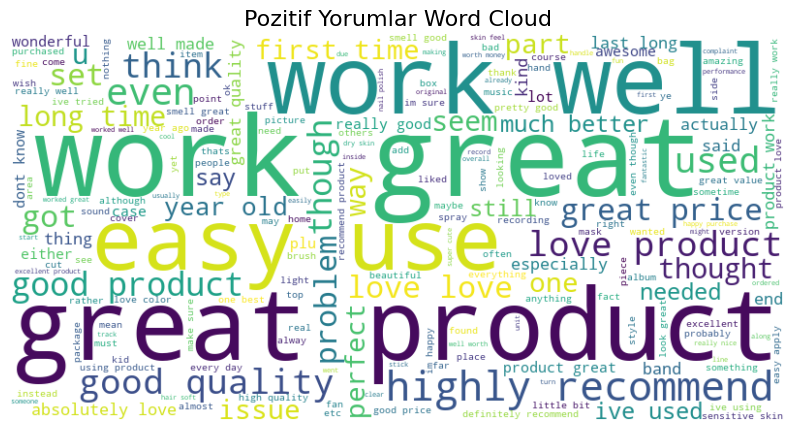

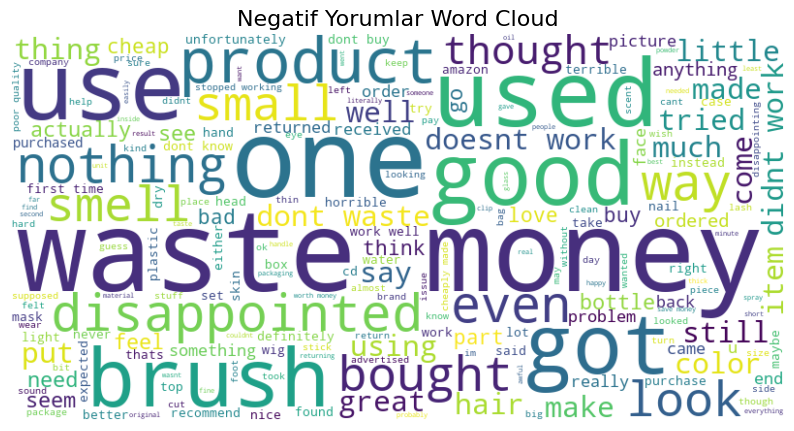

In [116]:
def plot_wordcloud(text, title):
    wordcloud = WordCloud(width=800, height=400, background_color='white', colormap='viridis').generate(text)
    plt.figure(figsize=(10, 6))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    plt.title(title, fontsize=16)
    plt.show()

# Pozitif Yorumlar Word Cloud
plot_wordcloud(df_positive, 'Pozitif Yorumlar Word Cloud')

# Negatif Yorumlar Word Cloud
plot_wordcloud(df_negative, 'Negatif Yorumlar Word Cloud')

 Kategorilere G√∂re Word Cloud (Her Kategori i√ßin Ayrƒ±)

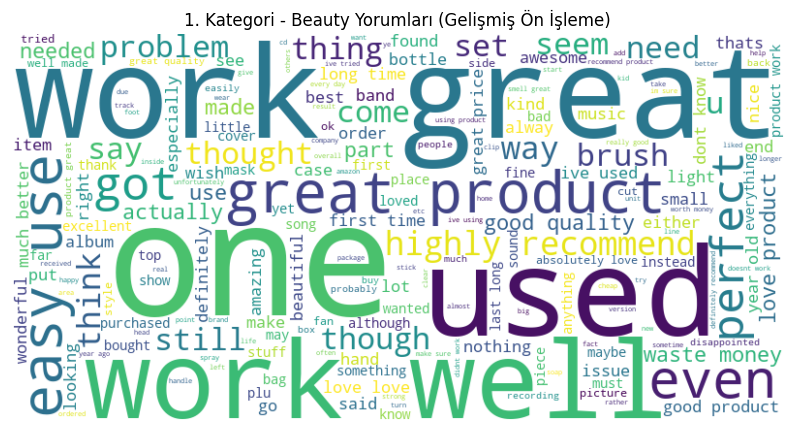

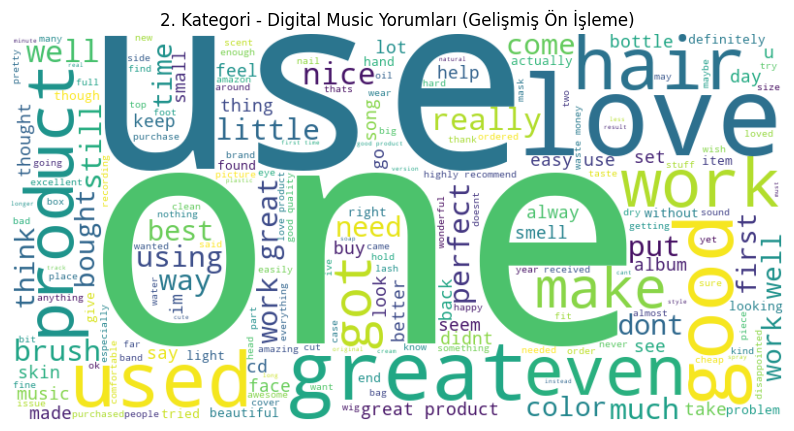

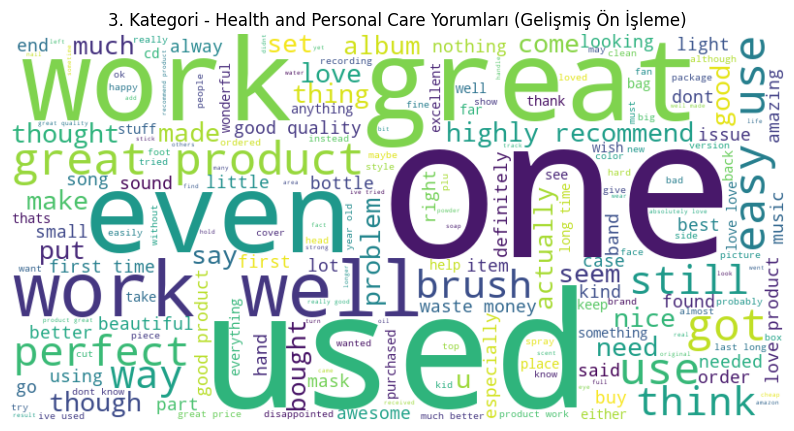

In [118]:
# K√ºt√ºphaneler
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Word Cloud √áizim Fonksiyonu
def plot_wordcloud(text, title):
    wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)
    plt.figure(figsize=(10, 6))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    plt.title(title)
    plt.show()

# 1. Veri Seti: Beauty
text_1 = df_all.iloc[:701528]['advanced_text'].str.cat(sep=' ')
plot_wordcloud(text_1, '1. Kategori - Beauty Yorumlarƒ± (Geli≈ümi≈ü √ñn ƒ∞≈üleme)')

# 2. Veri Seti: Digital Music
text_2 = df_all.iloc[701528:701528+130434]['advanced_text'].str.cat(sep=' ')
plot_wordcloud(text_2, '2. Kategori - Digital Music Yorumlarƒ± (Geli≈ümi≈ü √ñn ƒ∞≈üleme)')

# 3. Veri Seti: Health and Personal Care
text_3 = df_all.iloc[701528+130434:]['advanced_text'].str.cat(sep=' ')
plot_wordcloud(text_3, '3. Kategori - Health and Personal Care Yorumlarƒ± (Geli≈ümi≈ü √ñn ƒ∞≈üleme)')

1. Beauty Yorumlarƒ±
	‚Ä¢	√ñne √áƒ±kan Kelimeler: use, work, one, great, product, brush, recommend, easy, love, even, well
	‚Ä¢	Anlam:
	‚Ä¢	Kullanƒ±cƒ±lar √ºr√ºnlerin kullanƒ±m kolaylƒ±ƒüƒ±nƒ± (easy to use) ve etkili √ßalƒ±≈ümasƒ±nƒ± (work well) vurguluyor.
	‚Ä¢	Fƒ±r√ßa (brush) kelimesi sƒ±k√ßa ge√ßtiƒüi i√ßin makyaj fƒ±r√ßalarƒ±, sa√ß fƒ±r√ßalarƒ± gibi √ºr√ºnler √∂ne √ßƒ±kmƒ±≈ü.
	‚Ä¢	Olumlu geri bildirimler √∂ne √ßƒ±karken, even kelimesinin kullanƒ±mƒ± √ºr√ºnlerin beklentileri kar≈üƒ±ladƒ±ƒüƒ±na dair ifadeleri g√∂steriyor.

2. Digital Music Yorumlarƒ±
	‚Ä¢	√ñne √áƒ±kan Kelimeler: use, work, love, one, great, song, good, music, nice, sound
	‚Ä¢	Anlam:
	‚Ä¢	Kullanƒ±cƒ±lar m√ºzikle ilgili deneyimlerinde ses kalitesi (sound) ve m√ºzik sevgisini (love music) √∂n plana √ßƒ±karƒ±yor.
	‚Ä¢	≈ûarkƒ±lar (song) ve m√ºzik (music) kelimeleri, √ºr√ºnlerin kullanƒ±mƒ±nƒ±n g√ºnl√ºk hayattaki yerini g√∂steriyor.
	‚Ä¢	Yine kullanƒ±m kolaylƒ±ƒüƒ± (use, work) √∂nemli bir fakt√∂r olarak dikkat √ßekiyor.

3. Health and Personal Care Yorumlarƒ±
	‚Ä¢	√ñne √áƒ±kan Kelimeler: use, even, work, one, great, product, brush, recommend, good, easy
	‚Ä¢	Anlam:
	‚Ä¢	Saƒülƒ±k ve ki≈üisel bakƒ±m √ºr√ºnlerinde etkililik (work well) ve kolay kullanƒ±m (easy to use) √∂n planda.
	‚Ä¢	Fƒ±r√ßa (brush) kelimesi burada da √∂ne √ßƒ±kƒ±yor, muhtemelen di≈ü fƒ±r√ßalarƒ±, sa√ß fƒ±r√ßalarƒ± veya cilt bakƒ±m fƒ±r√ßalarƒ± gibi √ºr√ºnlerden kaynaklanƒ±yor.
	‚Ä¢	Olumlu geri bildirimler (recommend, good, great) yaygƒ±n.

 Genel Deƒüerlendirme
	‚Ä¢	Ortak Temalar: T√ºm kategorilerde kullanƒ±m kolaylƒ±ƒüƒ± (use, easy) ve etkililik (work, great, well) √∂n planda.
	‚Ä¢	Kategori Bazlƒ± Farklƒ±lƒ±klar:
	‚Ä¢	Beauty: brush ve recommend kelimeleri ile √ºr√ºn tavsiyeleri ve fƒ±r√ßalar √∂ne √ßƒ±kƒ±yor.
	‚Ä¢	Digital Music: love, song, sound, music kelimeleriyle m√ºzik dinleme deneyimi √∂n planda.
	‚Ä¢	Health and Personal Care: brush ve even kelimeleri, √ºr√ºnlerin g√ºnl√ºk kullanƒ±mdaki etkisini vurguluyor.

Sonu√ß olarak, kullanƒ±cƒ±lar t√ºm kategorilerde kullanƒ±m kolaylƒ±ƒüƒ± ve √ºr√ºnlerin i≈ülevselliƒüinden memnun g√∂r√ºn√ºyor. Word Cloud‚Äôlar, her kategorinin temel kullanƒ±m amacƒ± ve kullanƒ±cƒ± beklentilerini net bir ≈üekilde g√∂steriyor

Store Skorlama


store                         total_reviews  average_rating  rating_number  positive_reviews  negative_reviews  store_score
0                      Harper Lee   Format: Audio CD        1             4.700        131983.0             1                 0         620320.100 
1    J.K. Rowling   Mary GrandPr√©   Format: Audio CD        1             4.900        111099.0             1                 0         544385.100 
2                     Donna Tartt   Format: Audio CD        1             4.100        124260.0             1                 0         509466.000 
3                Patrick Rothfuss   Format: Audio CD        2             4.700         67614.0             2                 0         317785.800 
4                       Lee Child   Format: Audio CD        2             4.400         56583.5             2                 0         248967.400 
5                Michael Connelly   Format: Audio CD        4             4.425         49553.0             4                 0         219272.025 
6  George S. Clason   Charles Conrad   Best Succe...        2             4.700         43152.0             2                 0         202814.400 
7                Erin Morgenstern   Format: Audio CD        1             4.400         43750.0             1                 0         192500.000 
8                 Stephen Chbosky   Format: Audio CD        3             4.700         38258.0             3                 0         179812.600 
9           Gregory David Roberts   Format: Audio CD        1             4.600         35897.0             1                 0         165126.200

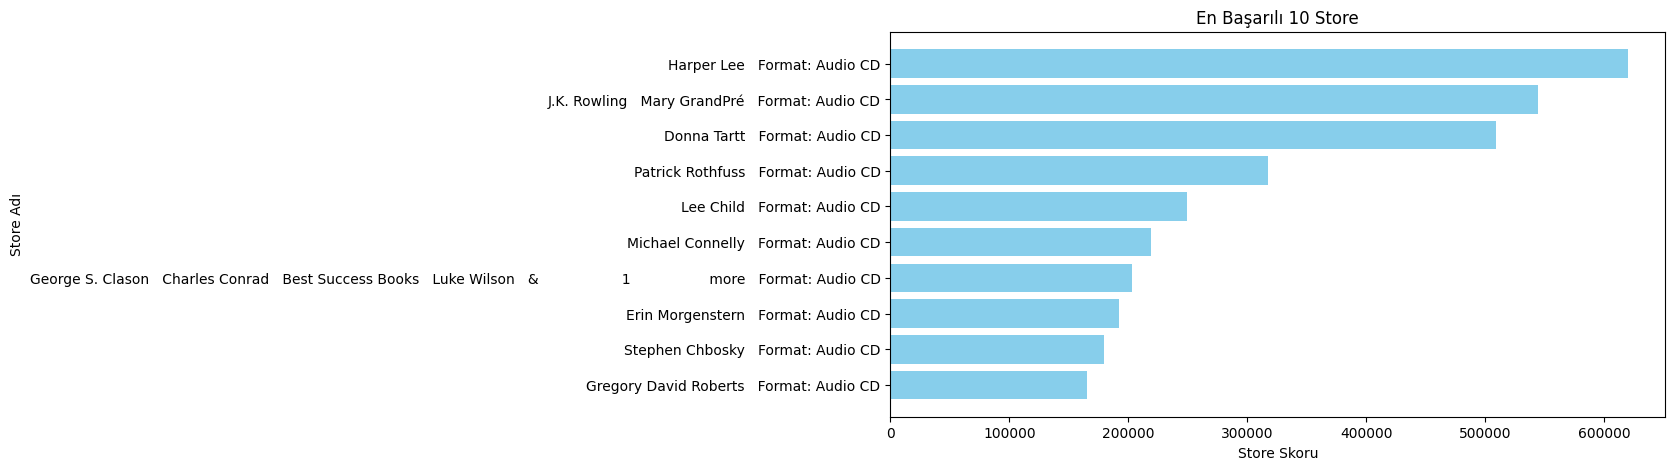

‚úÖ Store skorlarƒ± ba≈üarƒ±yla kaydedildi!


In [178]:
# üìå 1. Verileri Y√ºkleme ve Birle≈ütirme
df_all = pd.concat([df_All_Beauty_Review, Digital_Music_Review, Health_and_Personal_Care_Review], ignore_index=True)

# üìå 2. Sentiment Etiketleme (Rating >= 3 ‚Üí Pozitif, Aksi Takdirde Negatif)
df_all['sentiment'] = df_all['rating'].apply(lambda x: 'pozitif' if x >= 3 else 'negatif')

# üìå 3. Meta Verileriyle Birle≈ütirme
df_beauty = df_all.merge(df_All_Beauty_Meta[['parent_asin', 'title', 'average_rating', 'rating_number', 'store']], on='parent_asin', how='left')
df_music = df_all.merge(Digital_Music_Meta[['parent_asin', 'title', 'average_rating', 'rating_number', 'store']], on='parent_asin', how='left')
df_health = df_all.merge(Health_and_Personal_Care_Meta[['parent_asin', 'title', 'average_rating', 'rating_number', 'store']], on='parent_asin', how='left')
df_all = pd.concat([df_beauty, df_music, df_health], ignore_index=True)

# üìå 4. Sentiment Analiz Sonu√ßlarƒ±nƒ± Hesaplama (Pozitif & Negatif Yorum Sayƒ±sƒ±)
df_all['positive_reviews'] = (df_all['sentiment'] == 'pozitif').astype(int)
df_all['negative_reviews'] = (df_all['sentiment'] == 'negatif').astype(int)

# üìå 5. Store Skorunu Hesaplama
store_scores = df_all.groupby('store').agg(
    total_reviews=('rating', 'count'),
    average_rating=('average_rating', 'mean'),
    rating_number=('rating_number', 'mean'),
    positive_reviews=('positive_reviews', 'sum'),
    negative_reviews=('negative_reviews', 'sum')
).reset_index()

# üìå 6. Store Skor Form√ºl√ºn√º Uygulama
store_scores['store_score'] = ((store_scores['average_rating'] * store_scores['rating_number']) * 
                               (store_scores['positive_reviews'] - store_scores['negative_reviews'])) / store_scores['total_reviews']

# üìå 7. En Ba≈üarƒ±lƒ± 10 Store'u Listeleme
store_scores = store_scores.sort_values(by='store_score', ascending=False).reset_index(drop=True)
display(store_scores.head(10))

# üìå 8. En Ba≈üarƒ±lƒ± 10 Store'u Grafikle G√∂rselle≈ütirme
plt.figure(figsize=(10, 5))
plt.barh(store_scores['store'].head(10), store_scores['store_score'].head(10), color='skyblue')
plt.xlabel("Store Skoru")
plt.ylabel("Store Adƒ±")
plt.title("En Ba≈üarƒ±lƒ± 10 Store")
plt.gca().invert_yaxis()
plt.show()

# üìå 9. Sonu√ßlarƒ± Kaydetme
store_scores.to_csv('store_scores.csv', index=False)
print("‚úÖ Store skorlarƒ± ba≈üarƒ±yla kaydedildi!")

üìä Store Skorlama Sonu√ßlarƒ± Analizi

1Ô∏è‚É£ En Ba≈üarƒ±lƒ± Maƒüazalar:
	‚Ä¢	En y√ºksek skoru Harper Lee Format: Audio CD almƒ±≈ü, ardƒ±ndan J.K. Rowling Mary GrandPr√© Format: Audio CD geliyor.
	‚Ä¢	Listenin ilk sƒ±ralarƒ±nda yer alan maƒüazalar genellikle y√ºksek rating_number (deƒüerlendirme sayƒ±sƒ±) ve positive_reviews (olumlu yorum) deƒüerlerine sahip.

2Ô∏è‚É£ Store Skoru Hesaplamasƒ±:
	‚Ä¢	average_rating (ortalama puan) ve rating_number (toplam deƒüerlendirme sayƒ±sƒ±) b√ºy√ºk bir etkiye sahip.
	‚Ä¢	positive_reviews (olumlu yorum) arttƒ±k√ßa maƒüaza skoru y√ºkseliyor.
	‚Ä¢	Negatif yorumlar sƒ±fƒ±r olan maƒüazalar √ºst sƒ±ralara √ßƒ±kmƒ±≈ü.

3Ô∏è‚É£ G√∂rselle≈ütirme Analizi:
	‚Ä¢	Grafik en iyi 10 maƒüazayƒ± sƒ±ralayarak ba≈üarƒ±yƒ± g√∂rselle≈ütiriyor.
	‚Ä¢	En y√ºksek skoru alan maƒüazalar belirgin ≈üekilde ayrƒ±≈ümƒ±≈ü.
